In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# # Imports
# from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('train.csv', low_memory=False)
df['year_index'] = pd.Series(df['academicYear']).rank(method='dense').astype(int)

# Set academicYear as index if needed
df.set_index('year_index', inplace=True)

# # Display the DataFrame
# print("DataFrame with year index:")
# print(df.head())
print(df.columns)

Index(['academicYear', 'universityName', 'faculty', 'departmentName', 'idOSYM',
       'scholarshipRate', 'quota', 'occupiedSlots', 'tuitionFee',
       'universityLocation', 'universityRegion', 'profCount', 'assoCount',
       'docCount', 'baseRanking', 'topRanking', 'avgAdmissionRanking(TYT)',
       'baseAdmissionRanking(TYT)', 'stdDeviationStudents', 'revenue',
       'outOfCityStudentRate', 'totalPreference', 'top1PreferenceRatio',
       'avgOrderofPreference', 'avgAdmittedStudentPrefOrder',
       'top1AdmittedRatio', 'top3AdmittedRatio', 'top10AdmittedRatio',
       'admittedTotalPref', 'admittedTotalDepartmentPref',
       'currentStudentCount', 'baseScore', 'topScore', 'totalForeignStudents',
       'totalStudentNumber', 'Urap_Rank', 'Urap_Score',
       'avg_monthly_income_group', 'Time_for_employment', 'employment_rate',
       'base_salary_by_year', 'inflation_by_year', 'growth_by_year',
       'universityType_devlet', 'universityType_vakıf', 'programType_DİL',
       'pro

In [4]:
df['lag_baseRanking'] = df.groupby(['universityName', 'departmentName','faculty','scholarshipRate','idOSYM'])['baseRanking'].shift(1)
print(df.isnull().sum())

academicYear               0
universityName             0
faculty                    0
departmentName             0
idOSYM                     0
                       ...  
language_Çince             0
language_İngilizce         0
language_İspanyolca        0
language_İtalyanca         0
lag_baseRanking        11426
Length: 63, dtype: int64


In [5]:
df.fillna(0, inplace=True)

In [6]:
x_2019 = df.loc[1].drop('baseRanking', axis=1)
y_2019 = df.loc[1]['baseRanking']

x_2020 = df.loc[2].drop('baseRanking', axis=1)
y_2020 = df.loc[2]['baseRanking']

x_2021 = df.loc[3].drop('baseRanking', axis=1)
y_2021 = df.loc[3]['baseRanking']

x_2022 = df.loc[4].drop('baseRanking', axis=1)
y_2022 = df.loc[4]['baseRanking']

x_2023 = df.loc[5].drop('baseRanking', axis=1)
y_2023 = df.loc[5]['baseRanking']

x_2024 = df.loc[6].drop('baseRanking', axis=1)
y_2024 = df.loc[6]['baseRanking']

In [7]:


# Function to plot predictions vs. actual values
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predictions vs. Actual Values ({model_name})')
    plt.grid(True)
    plt.show()

# Function to plot residuals
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot ({model_name})')
    plt.grid(True)
    plt.show()

# Function to plot model performance metrics
def plot_model_performance(y_true, y_preds, model_names):
    metrics = {'Model': [], 'RMSE': [], 'MAE': [], 'R2': []}
    for y_pred, model_name in zip(y_preds, model_names):
        metrics['Model'].append(model_name)
        metrics['RMSE'].append(np.sqrt(mean_squared_error(y_true, y_pred)))
        metrics['MAE'].append(mean_absolute_error(y_true, y_pred))
        metrics['R2'].append(r2_score(y_true, y_pred))
    
    metrics_df = pd.DataFrame(metrics)
    metrics_df.set_index('Model', inplace=True)
    
    metrics_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()

def plot_r2_scores(y_true, y_preds, model_names):
    r2_scores = [r2_score(y_true, y_pred) for y_pred in y_preds]
    plt.figure(figsize=(12, 8))
    plt.bar(model_names, r2_scores, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('R2 Score')
    plt.title('R2 Scores of Different Models')
    plt.grid(True)
    plt.show()
# Function to plot line plot of predictions
def plot_predictions_line(y_true, y_preds, model_names):
    plt.figure(figsize=(12, 8))
    plt.plot(y_true, label='Actual Values', linestyle='--', marker='o')
    for y_pred, model_name in zip(y_preds, model_names):
        plt.plot(y_pred, label=f'Predicted Values ({model_name})', linestyle='--', marker='o')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Predictions Line Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

def visualize_model_performance(metrics_df):
    # Plot RMSE
    plt.figure(figsize=(14, 7))
    plt.plot(metrics_df.index, metrics_df['RMSE'], marker='o', label='RMSE')
    plt.xlabel('Year')
    plt.ylabel('RMSE')
    plt.title('Model Performance: RMSE by Year')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot MAE
    plt.figure(figsize=(14, 7))
    plt.plot(metrics_df.index, metrics_df['MAE'], marker='o', label='MAE')
    plt.xlabel('Year')
    plt.ylabel('MAE')
    plt.title('Model Performance: MAE by Year')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot R2
    plt.figure(figsize=(14, 7))
    plt.plot(metrics_df.index, metrics_df['R2'], marker='o', label='R2')
    plt.xlabel('Year')
    plt.ylabel('R2')
    plt.title('Model Performance: R2 by Year')
    plt.grid(True)
    plt.legend()
    plt.show()

# Visualize model comparison using MAE
def visualize_model_comparison(metrics_df):
    plt.figure(figsize=(14, 7))
    for model in metrics_df['Model'].unique():
        model_data = metrics_df[metrics_df['Model'] == model]
        plt.plot(model_data['Year'], model_data['MAE'], marker='o', label=model)
    plt.xlabel('Year')
    plt.ylabel('MAE')
    plt.title('Model Performance: MAE Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()
# Combine metrics into a single DataFrame
def combine_metrics(*metrics_dicts):
    combined_metrics = []
    for model_name, metrics in metrics_dicts:
        for year, values in metrics.items():
            combined_metrics.append({
                'Model': model_name,
                'Year': year,
                'RMSE': values['RMSE'],
                'MAE': values['MAE'],
                'R2': values['R2']
            })
    return pd.DataFrame(combined_metrics)


# # Example usage
# plot_predictions(y_true, y_pred_model1, 'Model 1')
# plot_residuals(y_true, y_pred_model1, 'Model 1')
# plot_model_performance(y_true, [y_pred_model1, y_pred_model2], ['Model 1', 'Model 2'])
# plot_predictions_line(y_true, [y_pred_model1, y_pred_model2], ['Model 1', 'Model 2'])

In [8]:

print("Shape of x_2019:", x_2019.shape)
print("Shape of y_2019:", y_2019.shape)

print("Shape of x_2020:", x_2020.shape)
print("Shape of y_2020:", y_2020.shape)

print("Shape of x_2021:", x_2021.shape)
print("Shape of y_2021:", y_2021.shape)

print("Shape of x_2022:", x_2022.shape)
print("Shape of y_2022:", y_2022.shape)

print("Shape of x_2023:", x_2023.shape)
print("Shape of y_2023:", y_2023.shape)

print("Shape of x_2024:", x_2024.shape)
print("Shape of y_2024:", y_2024.shape)

Shape of x_2019: (6524, 62)
Shape of y_2019: (6524,)
Shape of x_2020: (7695, 62)
Shape of y_2020: (7695,)
Shape of x_2021: (8927, 62)
Shape of y_2021: (8927,)
Shape of x_2022: (9246, 62)
Shape of y_2022: (9246,)
Shape of x_2023: (9777, 62)
Shape of y_2023: (9777,)
Shape of x_2024: (10052, 62)
Shape of y_2024: (10052,)


In [9]:
def train(model_or_constructor, x_train, y_train, x_test, **kwargs):
    if callable(model_or_constructor):
        # If it's a constructor, instantiate the model
        model = model_or_constructor(**kwargs)
    else:
        # If it's an instantiated model, use it directly
        model = model_or_constructor

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    
    return  model, y_pred

In [15]:
def evaluate(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Metrics:\nRMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    return rmse, mae, r2

In [11]:
def calculate_qerror(y_true, y_pred):
    """
    Calculate the quantile error (q-error) between the true and predicted values.

    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values

    Returns:
    float: The quantile error
    """
    q_error = np.maximum(y_true / y_pred, y_pred / y_true)
    return q_error


def evaluate_with_qerror(y_true, y_pred):
    """
    Calculate RMSE, MAE, R2, and Q-Error percentiles
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    q_errors = calculate_qerror(y_true, y_pred)
    q_error_median = np.median(q_errors)
    q_error_avg = np.mean(q_errors)
    q_error_percentiles = np.percentile(q_errors, [25, 50, 75, 90])
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Q-Error Median': q_error_median,
        'Q-error Mean': q_error_avg,
        'Q-Error P25': q_error_percentiles[0],
        'Q-Error P50': q_error_percentiles[1],
        'Q-Error P75': q_error_percentiles[2],
        'Q-Error P90': q_error_percentiles[3]
    }

In [12]:
q_error_cols = ['Q-error Mean','Q-Error P25', 'Q-Error P50', 'Q-Error P75', 'Q-Error P90']
q_error_cols_without_mean = ['Q-Error P25', 'Q-Error P50', 'Q-Error P75', 'Q-Error P90']
def visualize_qerrors(metrics_df):
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Line plot for all percentiles
    plt.subplot(211)
    for col in q_error_cols:
        plt.plot(metrics_df.index, metrics_df[col], marker='o', label=col)
    
    plt.title('Q-Error Percentiles Over Years and Average')
    plt.xlabel('Year')
    plt.ylabel('Q-Error log scaled')
    plt.yscale('log')
    

    plt.grid(True)
    plt.legend()

    # Plot 2: Bar plot comparing percentiles for each year
    plt.subplot(212)
    x = np.arange(len(metrics_df.index))
    width = 0.2

    for i, col in enumerate(q_error_cols):
        plt.bar(x + i*width, metrics_df[col], width, label=col, alpha=0.7)
    
    plt.title('Q-Error Percentiles Comparison by Year and Avarage')
    plt.xlabel('Year')
    plt.ylabel('Q-Error log scaled')
    plt.xticks(x + width*1.5, metrics_df.index)
    plt.grid(True)
    plt.legend()
    plt.yscale('log')

    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Line plot for all percentiles
    plt.subplot(211)
    for col in q_error_cols_without_mean:
        plt.plot(metrics_df.index, metrics_df[col], marker='o', label=col)
    
    plt.title('Q-Error Percentiles Over Years ')
    plt.xlabel('Year')
    plt.ylabel('Q-Error log scaled')
    plt.yscale('log')
    

    plt.grid(True)
    plt.legend()

    # Plot 2: Bar plot comparing percentiles for each year
    plt.subplot(212)
    x = np.arange(len(metrics_df.index))
    width = 0.2

    for i, col in enumerate(q_error_cols_without_mean):
        plt.bar(x + i*width, metrics_df[col], width, label=col, alpha=0.7)
    
    plt.title('Q-Error Percentiles Comparison by Year')
    plt.xlabel('Year')
    plt.ylabel('Q-Error log scaled')
    plt.xticks(x + width*1.5, metrics_df.index)
    plt.grid(True)
    plt.legend()
    plt.yscale('log')

    plt.tight_layout()
    plt.show()

# Additional analysis of worst predictions across years
def analyze_worst_predictions_trends(worst_predictions_by_year):
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Number of worst predictions by year
    plt.subplot(221)
    counts = [len(df) for df in worst_predictions_by_year.values()]
    plt.bar(worst_predictions_by_year.keys(), counts)
    plt.title('Number of Worst Predictions by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    
    # Plot 2: Average Q-Error of worst predictions by year
    plt.subplot(222)
    avg_qerrors = [df['Q-Error'].mean() for df in worst_predictions_by_year.values()]
    plt.bar(worst_predictions_by_year.keys(), avg_qerrors)
    plt.title('Average Q-Error of Worst Predictions')
    plt.xlabel('Year')
    plt.ylabel('Average Q-Error')
    
    
    # Print summary statistics
    print("\nSummary of Worst Predictions by Year:")
    summary_stats = pd.DataFrame({
        'Year': worst_predictions_by_year.keys(),
        'Count': counts,
        'Avg Q-Error': avg_qerrors,
        'Max Q-Error': [df['Q-Error'].max() for df in worst_predictions_by_year.values()],
        'Min Q-Error': [df['Q-Error'].min() for df in worst_predictions_by_year.values()]
    }).set_index('Year')
    
    print(summary_stats.round(2))
    
    return summary_stats

def visualize_worst_predictions(y_true, y_pred, year, threshold_percentile=90):
    """
    Visualize predictions with Q-Error above the specified percentile threshold
    """
    # Calculate Q-Errors
    q_errors = calculate_qerror(y_true, y_pred)
    
    # Calculate threshold
    threshold = np.percentile(q_errors, threshold_percentile)
    
    # Find worst predictions
    worst_indices = q_errors > threshold
    
    # Create DataFrame for analysis
    analysis_df = pd.DataFrame({
        'True Value': y_true[worst_indices],
        'Predicted': y_pred[worst_indices],
        'Q-Error': q_errors[worst_indices]
    }).sort_values('Q-Error', ascending=False)
    
    # Plotting
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of worst predictions
    plt.subplot(211)
    scatter = plt.scatter(analysis_df['True Value'], analysis_df['Predicted'], 
                         alpha=0.6, c=analysis_df['Q-Error'], cmap='coolwarm')
    
    # Add perfect prediction line
    min_val = min(analysis_df['True Value'].min(), analysis_df['Predicted'].min())
    max_val = max(analysis_df['True Value'].max(), analysis_df['Predicted'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'g--', label='Perfect Prediction')
    
    plt.colorbar(scatter, label='Q-Error')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.title(f'Worst Predictions (Q-Error > {threshold:.2f}) for Year {year}')
    plt.legend()
    
    # Bar plot of Q-Errors with improved visualization
    plt.subplot(212)
    qerrors = analysis_df['Q-Error']
    plt.bar(range(len(qerrors)), qerrors, color='skyblue', alpha=0.7, label='Q-Error')
    plt.axhline(y=threshold, color='r', linestyle='--', 
                label=f'{threshold_percentile}th Percentile ({threshold:.2f})')
    
    plt.xlabel('Index of Prediction (Sorted by Q-Error)')
    plt.ylabel('Q-Error')
    plt.title('Q-Errors of Worst Predictions (Sorted)')
    plt.legend()
    plt.yscale('log')  # Add log scaling to the y-axis
    plt.ylim(bottom=1e-2)  # Set a reasonable lower limit for log scale    plt.tight_layout()
    plt.show()
    
    # Print analysis
    print(f"\nWorst Predictions Analysis for Year {year}")
    print(f"Number of predictions above {threshold_percentile}th percentile: {len(analysis_df)}")
    print(f"Q-Error threshold: {threshold:.2f}")
    print("\nTop 10 Worst Predictions:")
    print(analysis_df.head(10).round(2))
    
    return analysis_df
def compare_models_qerror(model_metrics_dict):
    """
    Compare multiple models based on their Q-Error metrics
    
    Parameters:
    model_metrics_dict: dict
        Dictionary with format {'model_name': metrics_df}
        where metrics_df contains Q-Error metrics
    """
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Median Q-Error comparison across years
    plt.subplot(211)
    for model_name, metrics_df in model_metrics_dict.items():
        plt.plot(metrics_df.index, metrics_df['Q-Error P50'], 
                marker='o', label=f'{model_name}', linewidth=2)
    
    plt.title('Median Q-Error Comparison Across Years')
    plt.xlabel('Year')
    plt.ylabel('Median Q-Error (log scale)')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    



/Users/omeryildiz/Desktop/grad_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.450e+13, tolerance: 3.016e+10
  model = cd_fast.enet_coordinate_descent(


Model Metrics:
RMSE: 27801781122.0892, MAE: 104602.8355, R^2: 0.6523

Year 2020 Metrics:
RMSE: 27801781122.0892, MAE: 104602.8355, R^2: 0.6523


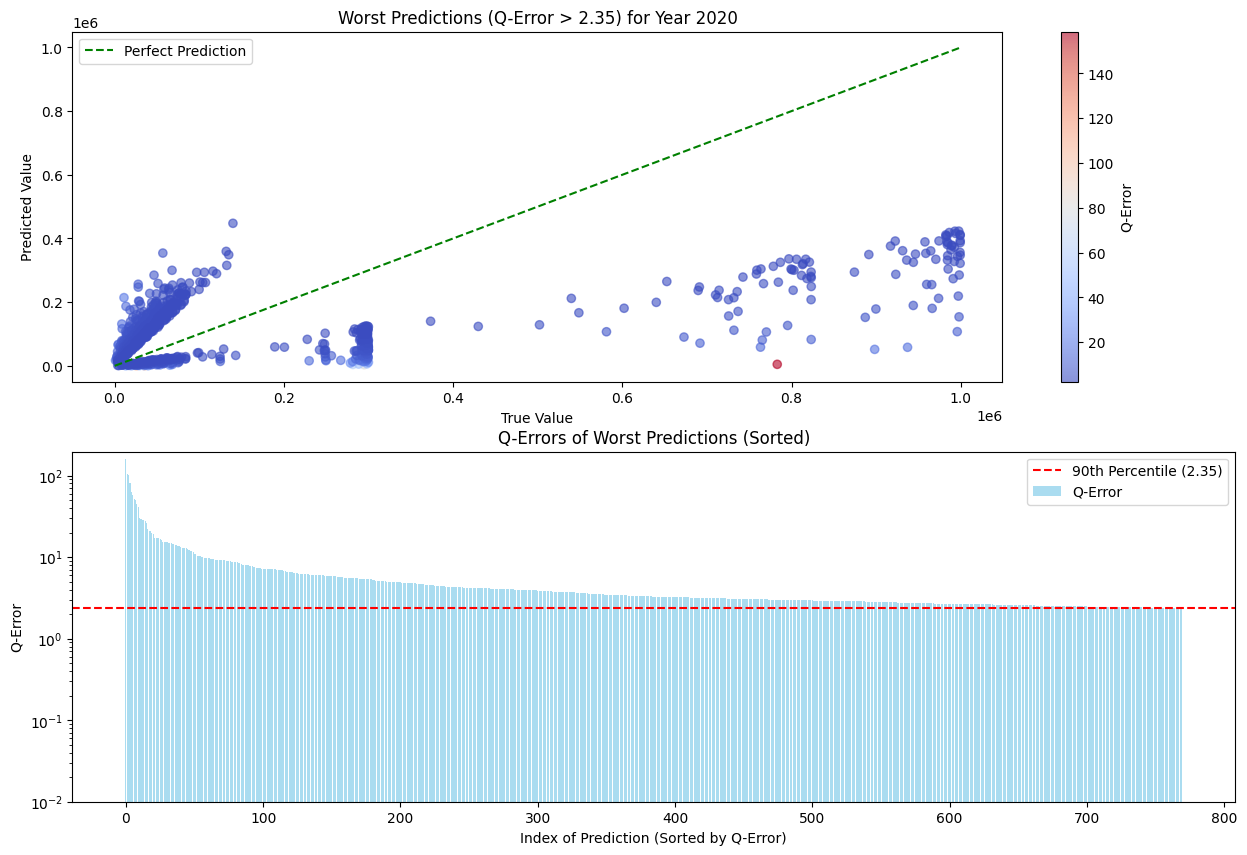


Worst Predictions Analysis for Year 2020
Number of predictions above 90th percentile: 770
Q-Error threshold: 2.35

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
2             783108.0    4936.01   158.65
2              25746.0     246.99   104.24
2              35656.0     354.09   100.70
2             295006.0    3666.87    80.45
2             281616.0    4450.30    63.28
2              39618.0     686.15    57.74
2             288474.0    5612.19    51.40
2              29230.0     578.10    50.56
2             298445.0    6577.00    45.38
2              13270.0     324.01    40.96


/Users/omeryildiz/Desktop/grad_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.840e+13, tolerance: 6.153e+10
  model = cd_fast.enet_coordinate_descent(


Model Metrics:
RMSE: 14341383806.3776, MAE: 79500.7047, R^2: 0.6369

Year 2021 Metrics:
RMSE: 14341383806.3776, MAE: 79500.7047, R^2: 0.6369


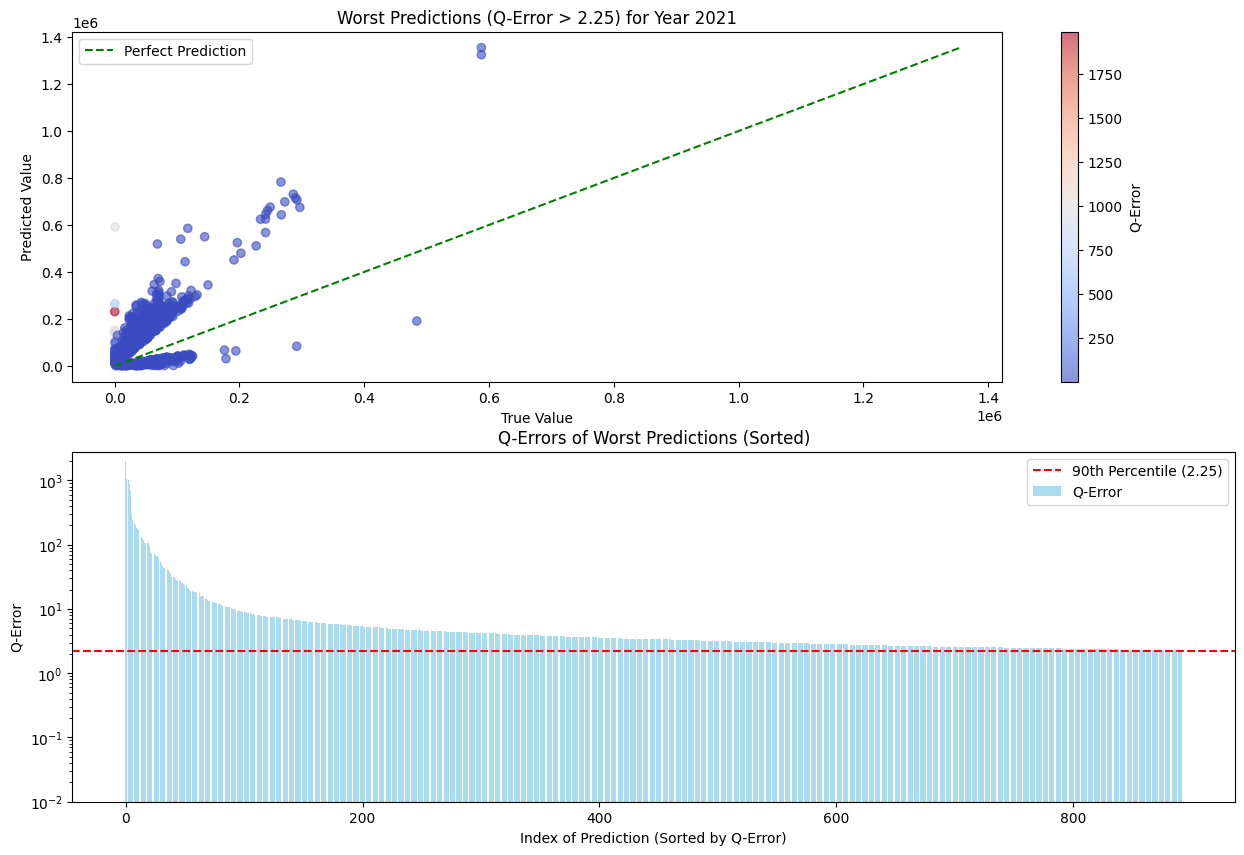


Worst Predictions Analysis for Year 2021
Number of predictions above 90th percentile: 893
Q-Error threshold: 2.25

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
3                116.0  230862.22  1990.19
3                145.0  150540.63  1038.21
3                586.0  591980.75  1010.21
3                154.0  137123.32   890.41
3                390.0  264259.66   677.59
3              40330.0     132.35   304.73
3                221.0   52929.21   239.50
3                207.0   44610.94   215.51
3              37357.0     182.01   205.25
3                320.0   58362.74   182.38


/Users/omeryildiz/Desktop/grad_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.942e+13, tolerance: 3.526e+10
  model = cd_fast.enet_coordinate_descent(


Model Metrics:
RMSE: 31343500482.3396, MAE: 104483.6901, R^2: 0.7404

Year 2022 Metrics:
RMSE: 31343500482.3396, MAE: 104483.6901, R^2: 0.7404


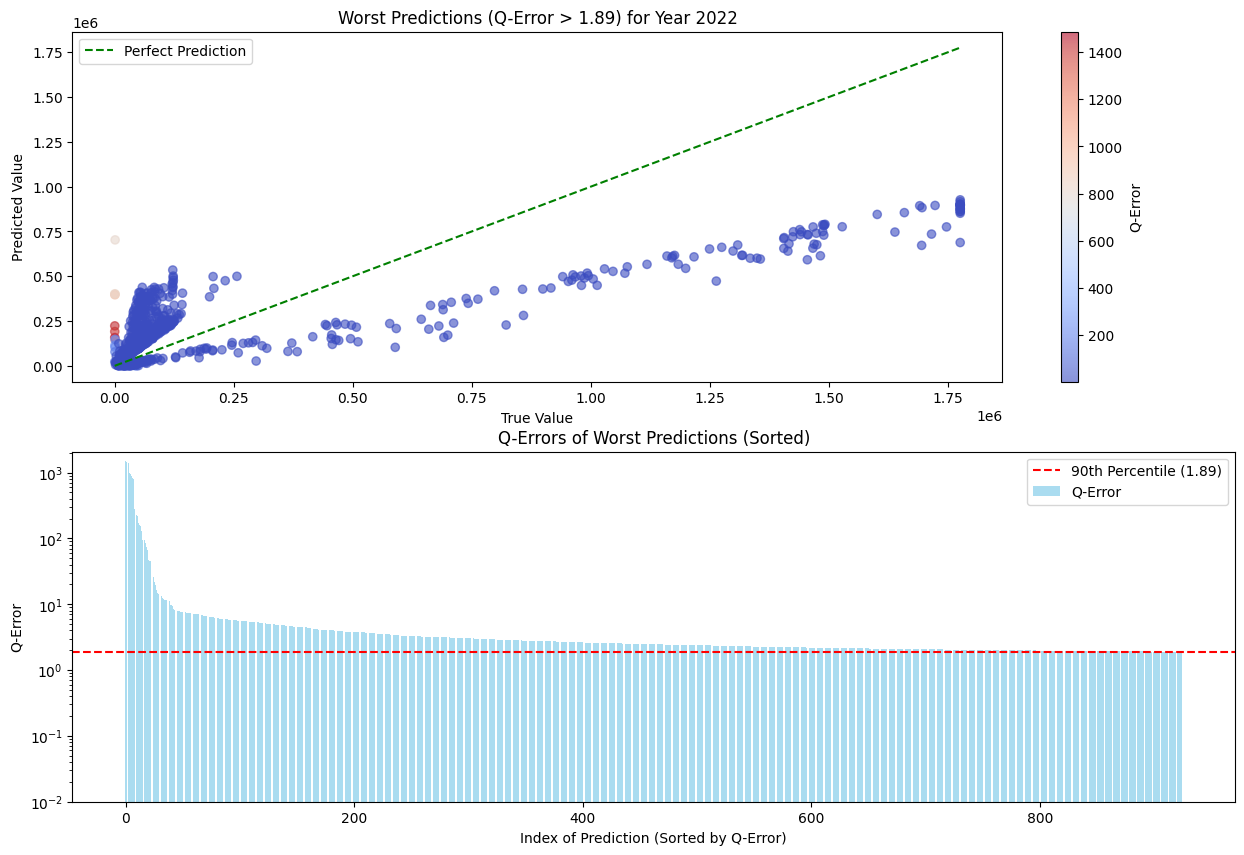


Worst Predictions Analysis for Year 2022
Number of predictions above 90th percentile: 925
Q-Error threshold: 1.89

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
4                106.0  157609.83  1486.89
4                156.0  223042.59  1429.76
4                136.0  191295.02  1406.58
4                148.0  144359.09   975.40
4                420.0  396559.19   944.19
4                455.0  399969.56   879.05
4                490.0  401847.69   820.10
4                872.0  703043.05   806.24
4                410.0  115045.20   280.60
4              43123.0     193.12   223.29


/Users/omeryildiz/Desktop/grad_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.624e+13, tolerance: 1.117e+11
  model = cd_fast.enet_coordinate_descent(


Model Metrics:
RMSE: 44347286193.9061, MAE: 136236.6967, R^2: 0.7520

Year 2023 Metrics:
RMSE: 44347286193.9061, MAE: 136236.6967, R^2: 0.7520


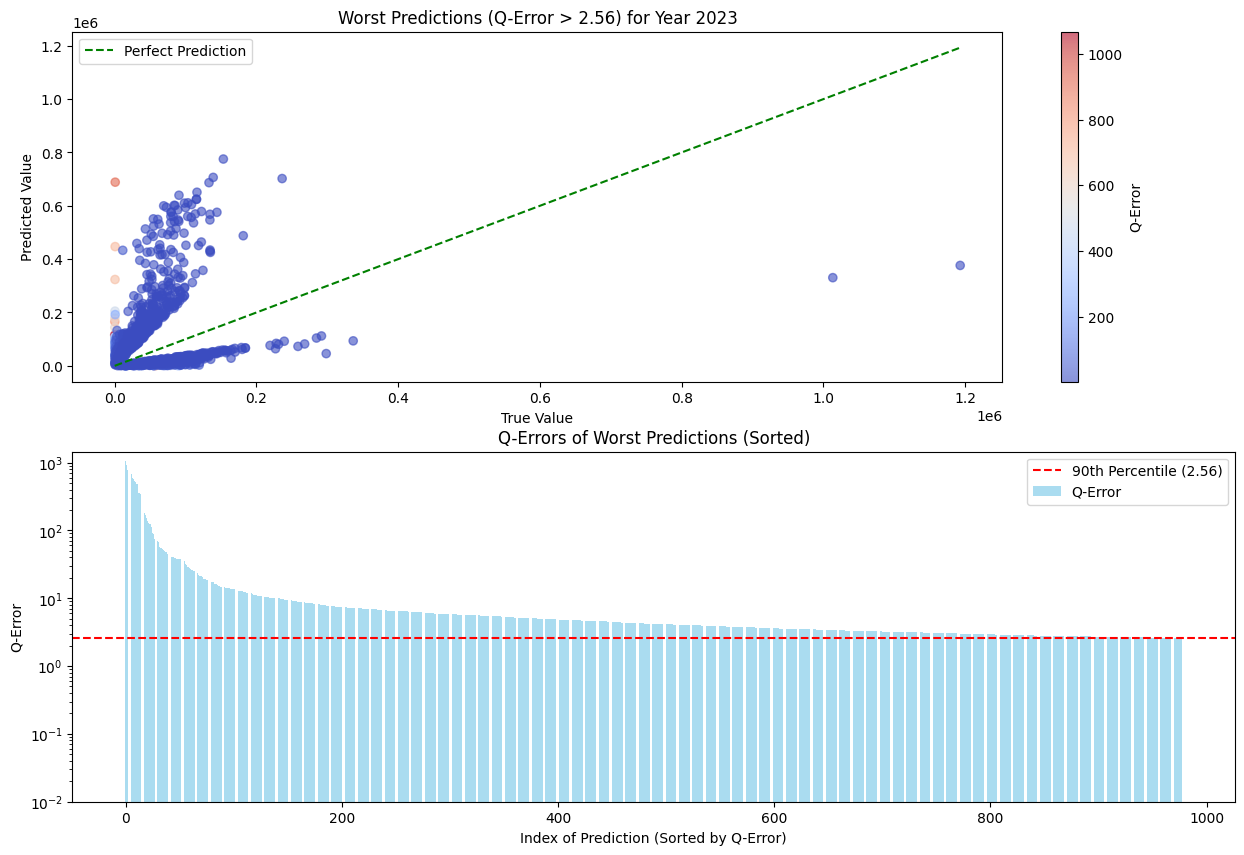


Worst Predictions Analysis for Year 2023
Number of predictions above 90th percentile: 978
Q-Error threshold: 2.56

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
5                108.0  115236.10  1067.00
5                754.0  688629.57   913.30
5                211.0  165623.21   784.94
5              57240.0      75.76   755.50
5                634.0  447087.10   705.18
5                470.0  323717.75   688.76
5                300.0  178746.49   595.82
5                250.0  143762.64   575.05
5                173.0   92928.04   537.16
5                143.0   73999.23   517.48


/Users/omeryildiz/Desktop/grad_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.051e+13, tolerance: 1.748e+11
  model = cd_fast.enet_coordinate_descent(


Model Metrics:
RMSE: 25987960442.5668, MAE: 107791.1797, R^2: 0.8668

Year 2024 Metrics:
RMSE: 25987960442.5668, MAE: 107791.1797, R^2: 0.8668


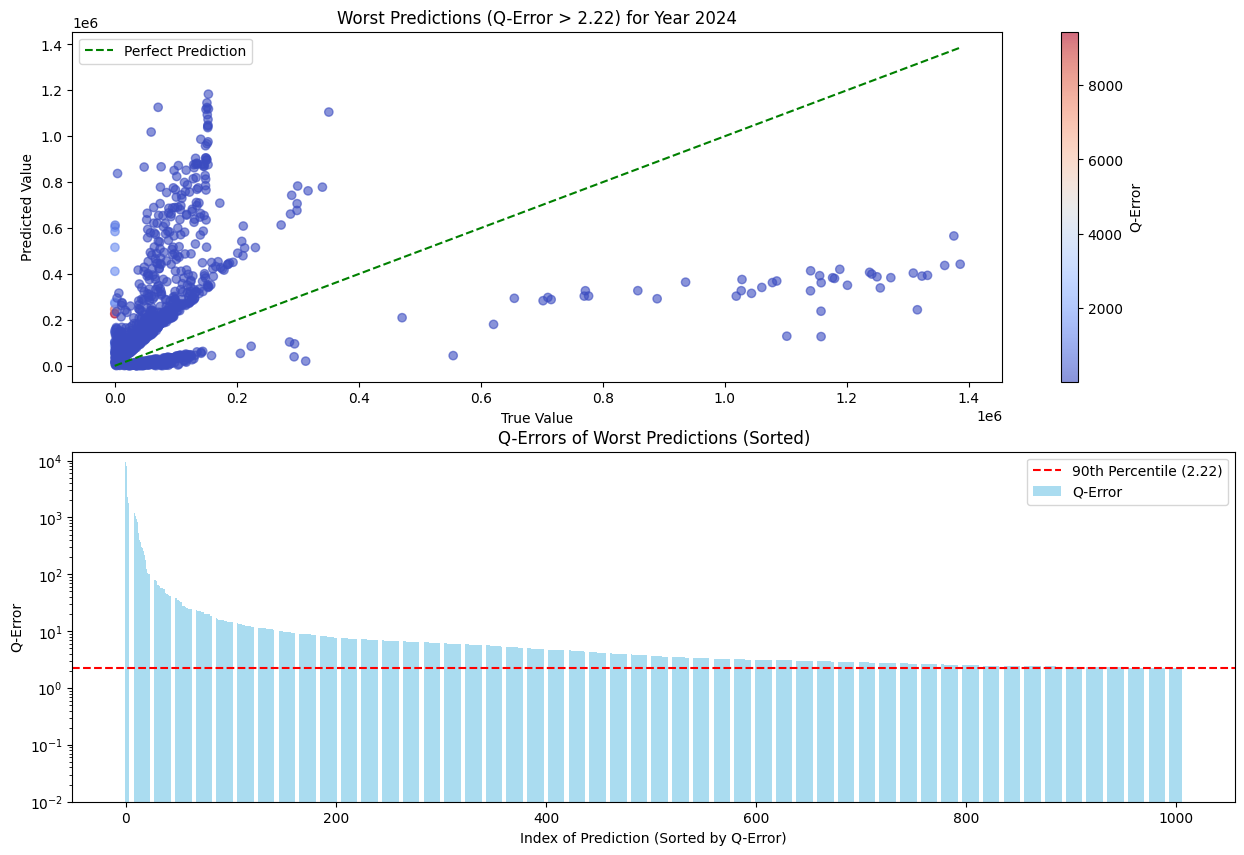


Worst Predictions Analysis for Year 2024
Number of predictions above 90th percentile: 1006
Q-Error threshold: 2.22

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
6                 24.0  226745.53  9447.73
6                 31.0  246130.54  7939.69
6                122.0  276964.33  2270.20
6                334.0  603747.94  1807.63
6                364.0  516170.94  1418.05
6                298.0  411782.53  1381.82
6                203.0  271355.79  1336.73
6                464.0  584907.60  1260.58
6                 55.0   65492.58  1190.77
6                 94.0  101193.04  1076.52

Visualization of Q-Errors:


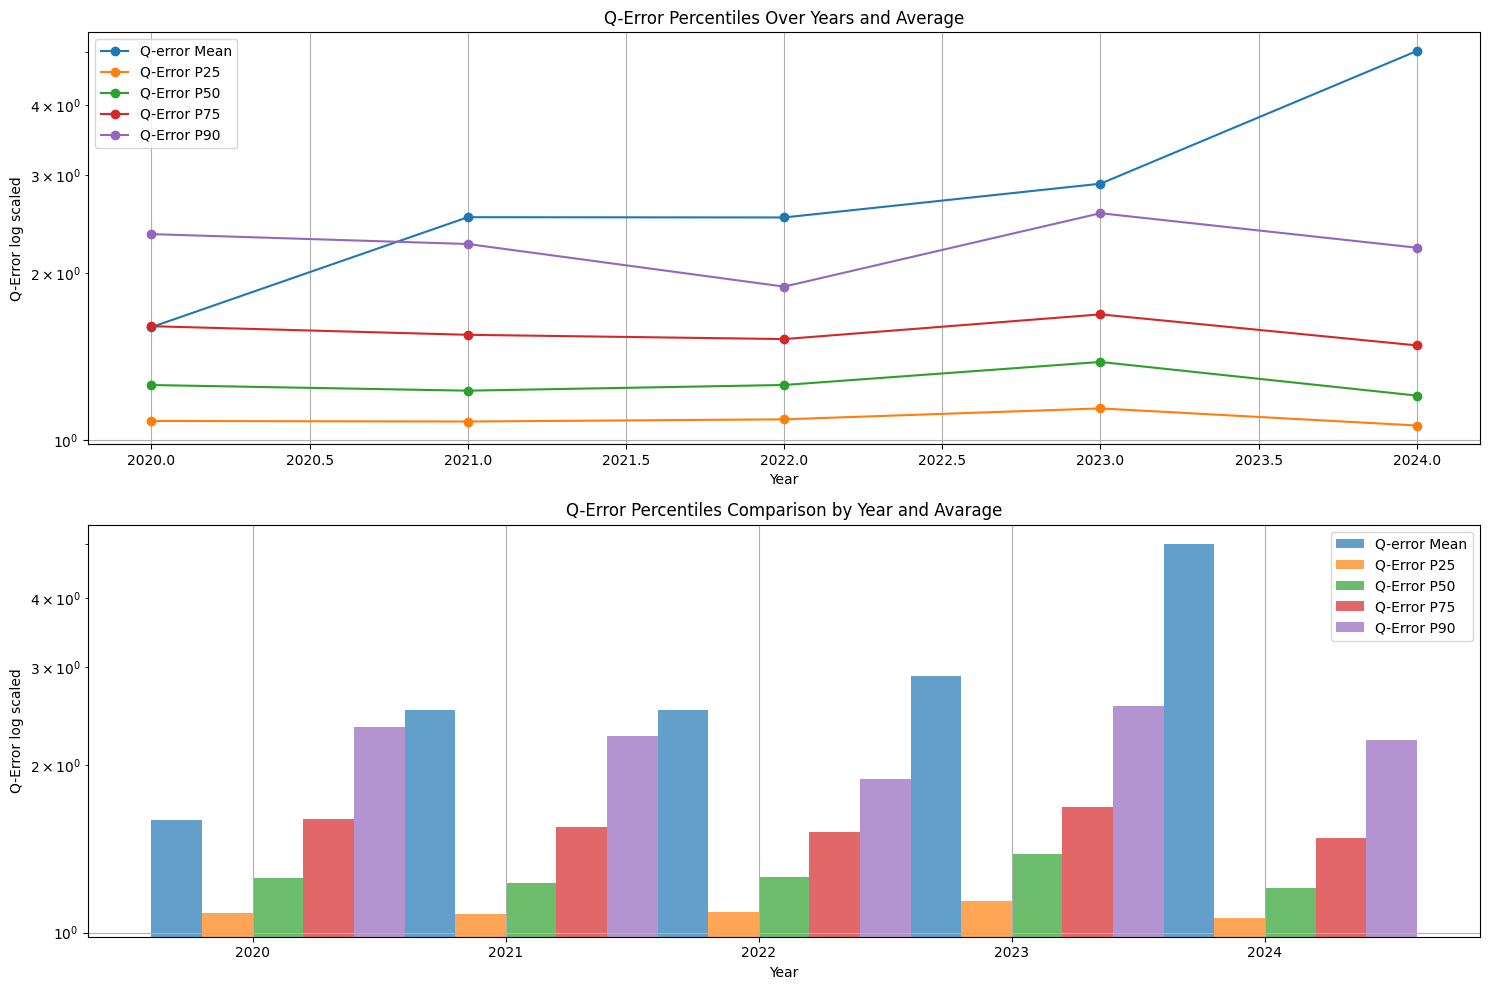

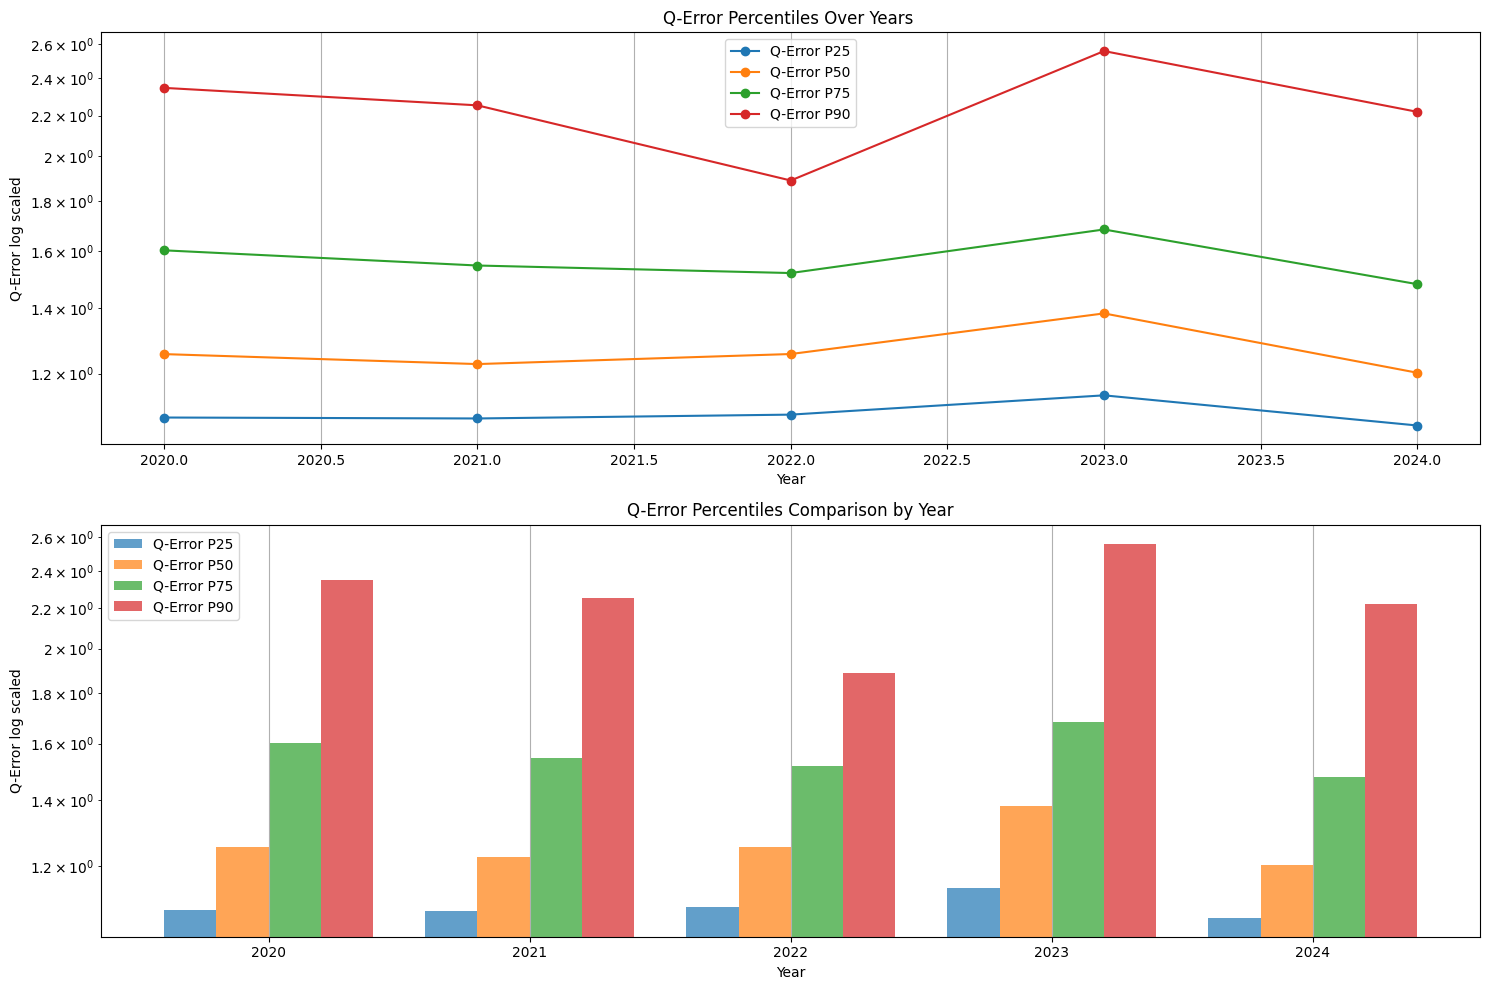


Visualization of Model Performance:


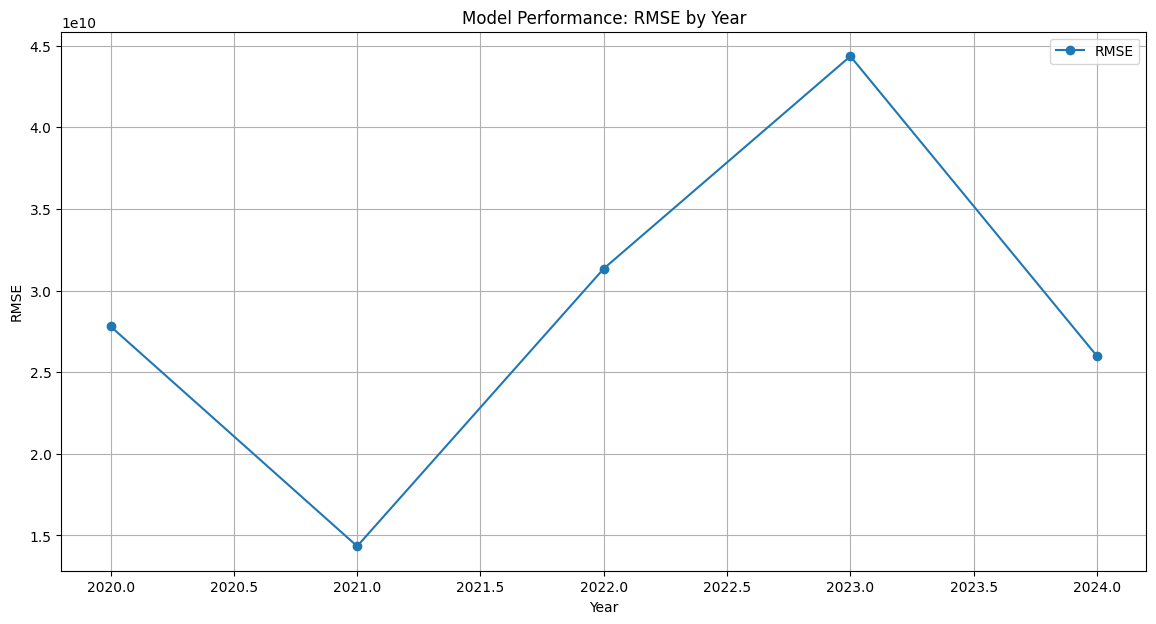

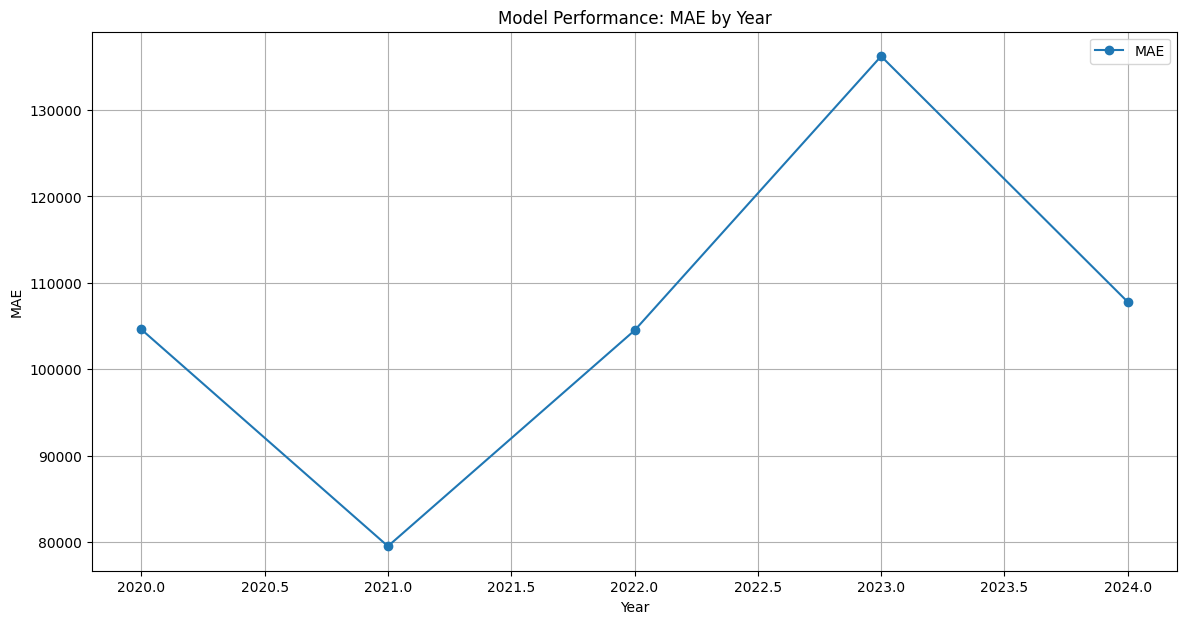

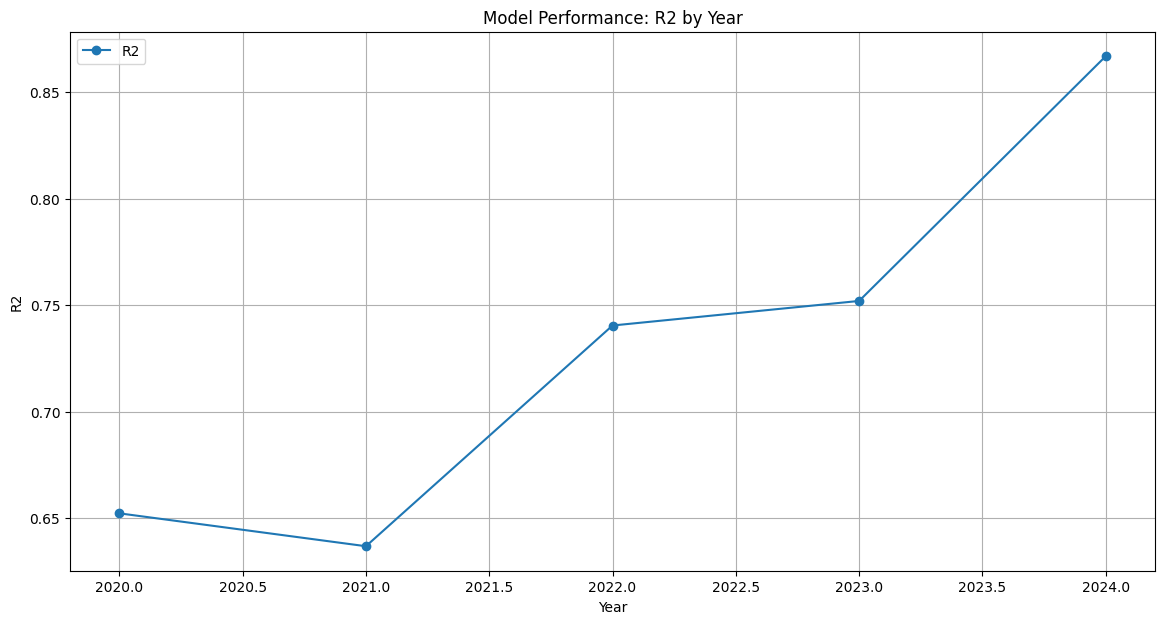

In [16]:
x_year = [x_2019, x_2020, x_2021, x_2022, x_2023, x_2024]
y_year = [y_2019, y_2020, y_2021, y_2022, y_2023, y_2024]

lasso_model = Lasso(alpha=0.1)
lasso_metrics = {}
lasso_metrics_qerror = {}
lasso_model_year = {}
worst_predictions_by_year = {}  # To store worst predictions analysis

for i in range(1, len(x_year)):
    year = 2020+i-1
    lasso_model, pred = train(lasso_model, x_year[i-1], y_year[i-1], x_year[i])
    rmse, mae, r2 = evaluate(y_year[i], pred)
    
    # Store basic metrics
    lasso_metrics[year] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    lasso_metrics_qerror[year] = evaluate_with_qerror(y_year[i], pred)
    lasso_model_year[year] = lasso_model
    
    print(f"\nYear {year} Metrics:")
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    
    # Analyze and visualize worst predictions
    worst_predictions_df = visualize_worst_predictions(y_year[i], pred, year)
    worst_predictions_by_year[year] = worst_predictions_df

# Visualize Q-Errors and model performance
metrics_df_qerror = pd.DataFrame(lasso_metrics_qerror).T
metrics_df = pd.DataFrame(lasso_metrics).T

print("\nVisualization of Q-Errors:")
visualize_qerrors(metrics_df_qerror)

print("\nVisualization of Model Performance:")
visualize_model_performance(metrics_df)

Model Metrics:
RMSE: 19384570909.2603, MAE: 66018.2607, R^2: 0.7576

Year 2020 Metrics:
RMSE: 19384570909.2603, MAE: 66018.2607, R^2: 0.7576


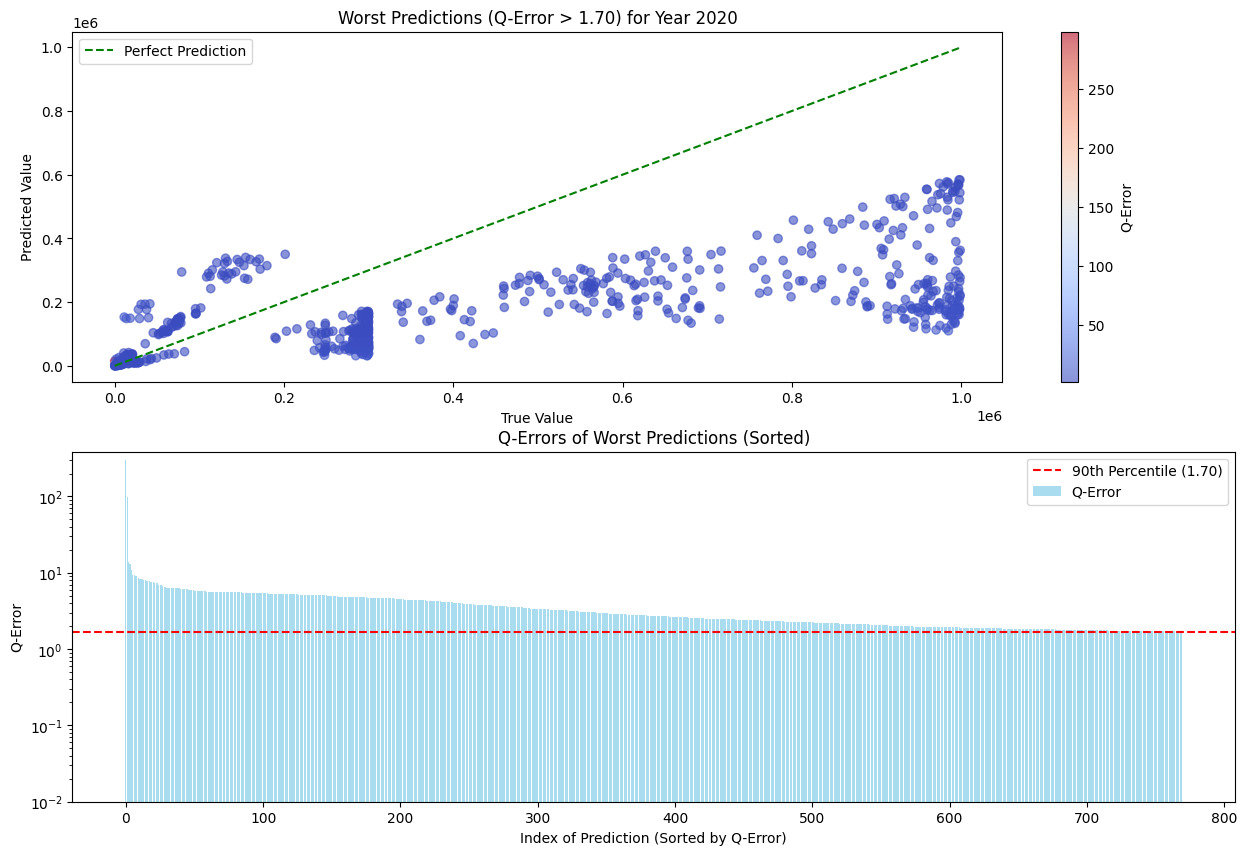


Worst Predictions Analysis for Year 2020
Number of predictions above 90th percentile: 770
Q-Error threshold: 1.70

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
2                 48.0   14316.07   298.25
2                 37.0    3621.74    97.88
2              11184.0  153154.41    13.69
2               1625.0   20980.95    12.91
2              13527.0  148501.23    10.98
2             298375.0   31905.66     9.35
2             298229.0   32115.76     9.29
2             284819.0   31767.11     8.97
2             985045.0  109955.39     8.96
2             970518.0  112615.73     8.62
Model Metrics:
RMSE: 7648121815.7229, MAE: 36102.0239, R^2: 0.8063

Year 2021 Metrics:
RMSE: 7648121815.7229, MAE: 36102.0239, R^2: 0.8063


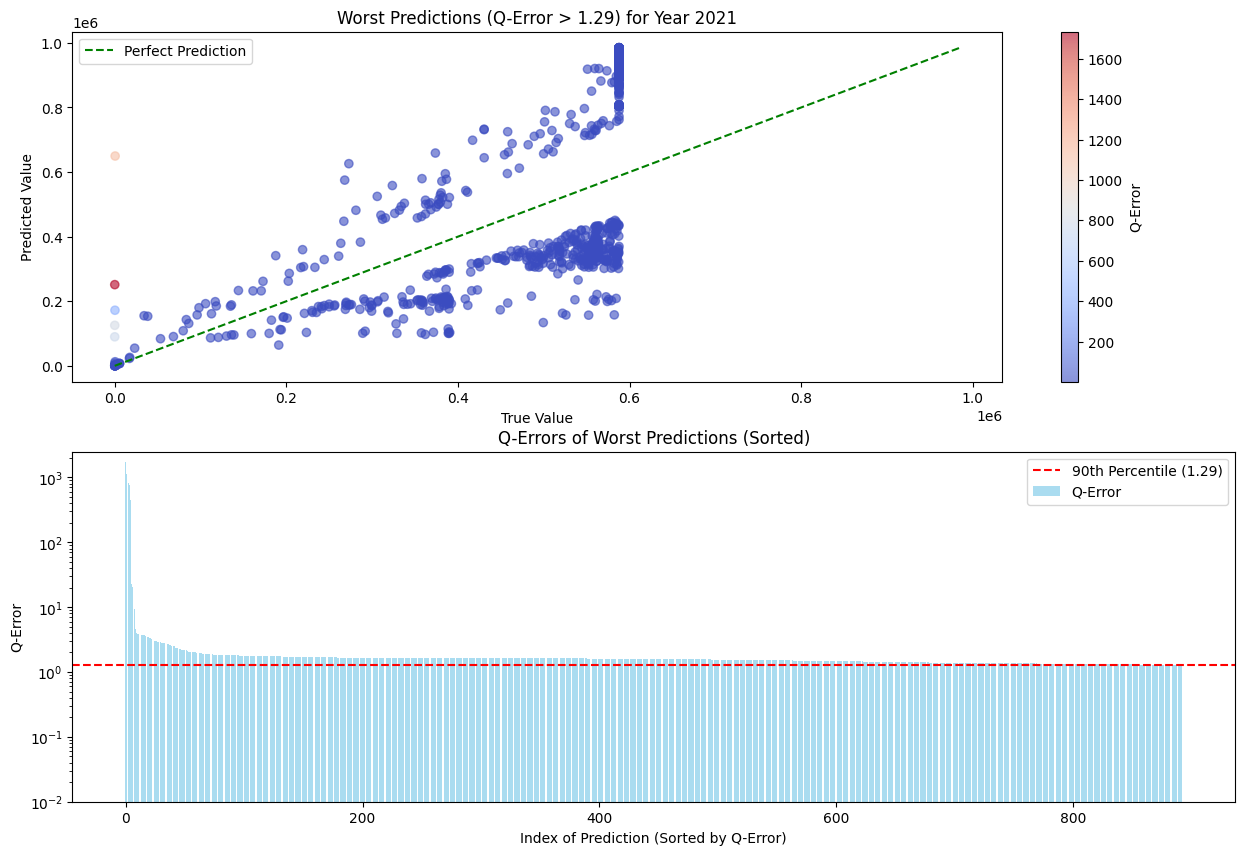


Worst Predictions Analysis for Year 2021
Number of predictions above 90th percentile: 893
Q-Error threshold: 1.29

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
3                145.0  251406.47  1733.84
3                586.0  649628.27  1108.58
3                154.0  125486.56   814.85
3                116.0   89888.52   774.90
3                390.0  172192.24   441.52
3                560.0   12629.07    22.55
3                400.0    8060.06    20.15
3                180.0    1706.65     9.48
3              34325.0  155151.64     4.52
3              38560.0  153581.76     3.98
Model Metrics:
RMSE: 43724068689.7134, MAE: 86609.2530, R^2: 0.6379

Year 2022 Metrics:
RMSE: 43724068689.7134, MAE: 86609.2530, R^2: 0.6379


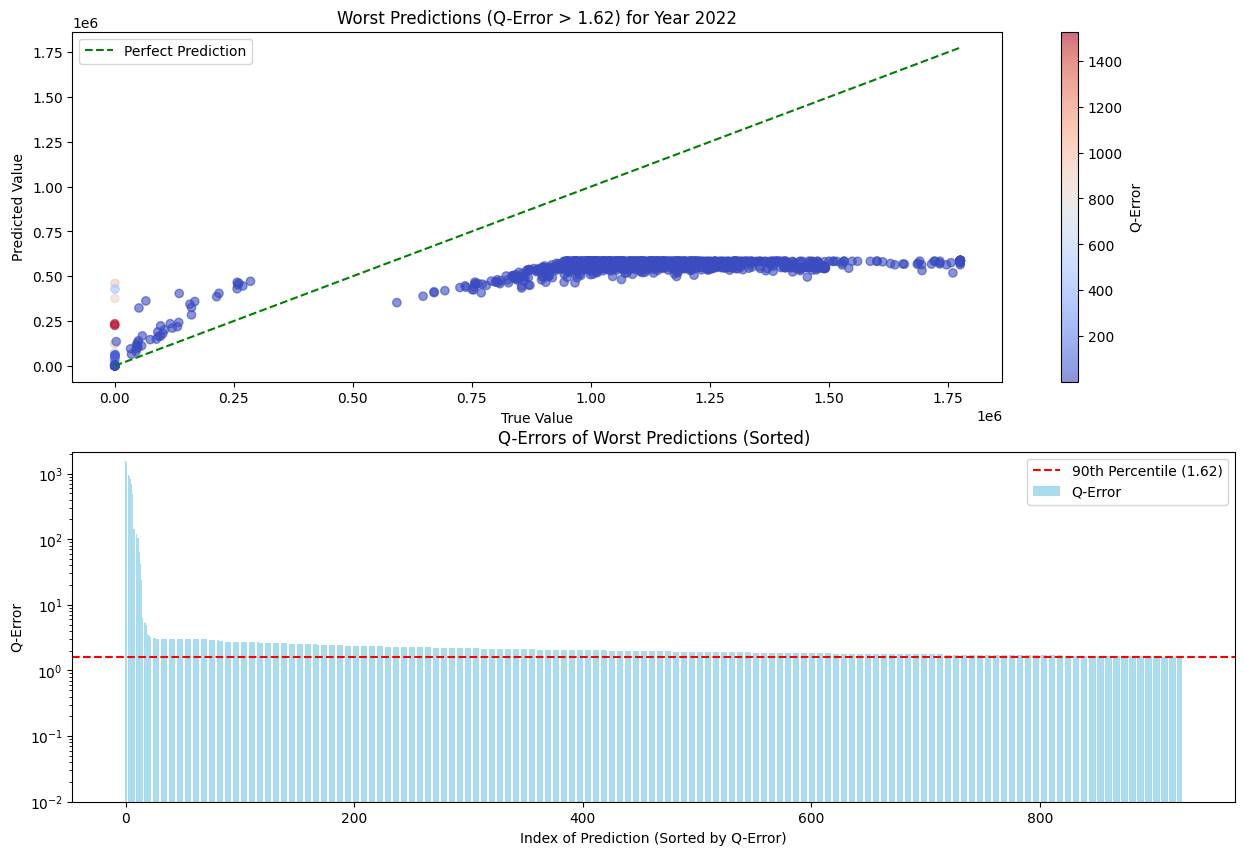


Worst Predictions Analysis for Year 2022
Number of predictions above 90th percentile: 925
Q-Error threshold: 1.62

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
4                148.0  225944.47  1526.65
4                156.0  235000.41  1506.41
4                490.0  460218.36   939.22
4                136.0  124557.35   915.86
4                455.0  376729.79   827.98
4                106.0   74200.87   700.01
4                872.0  428557.11   491.46
4                410.0   58744.23   143.28
4                420.0   59782.14   142.34
4                260.0   30824.13   118.55
Model Metrics:
RMSE: 2099707214.8975, MAE: 22900.6644, R^2: 0.9883

Year 2023 Metrics:
RMSE: 2099707214.8975, MAE: 22900.6644, R^2: 0.9883


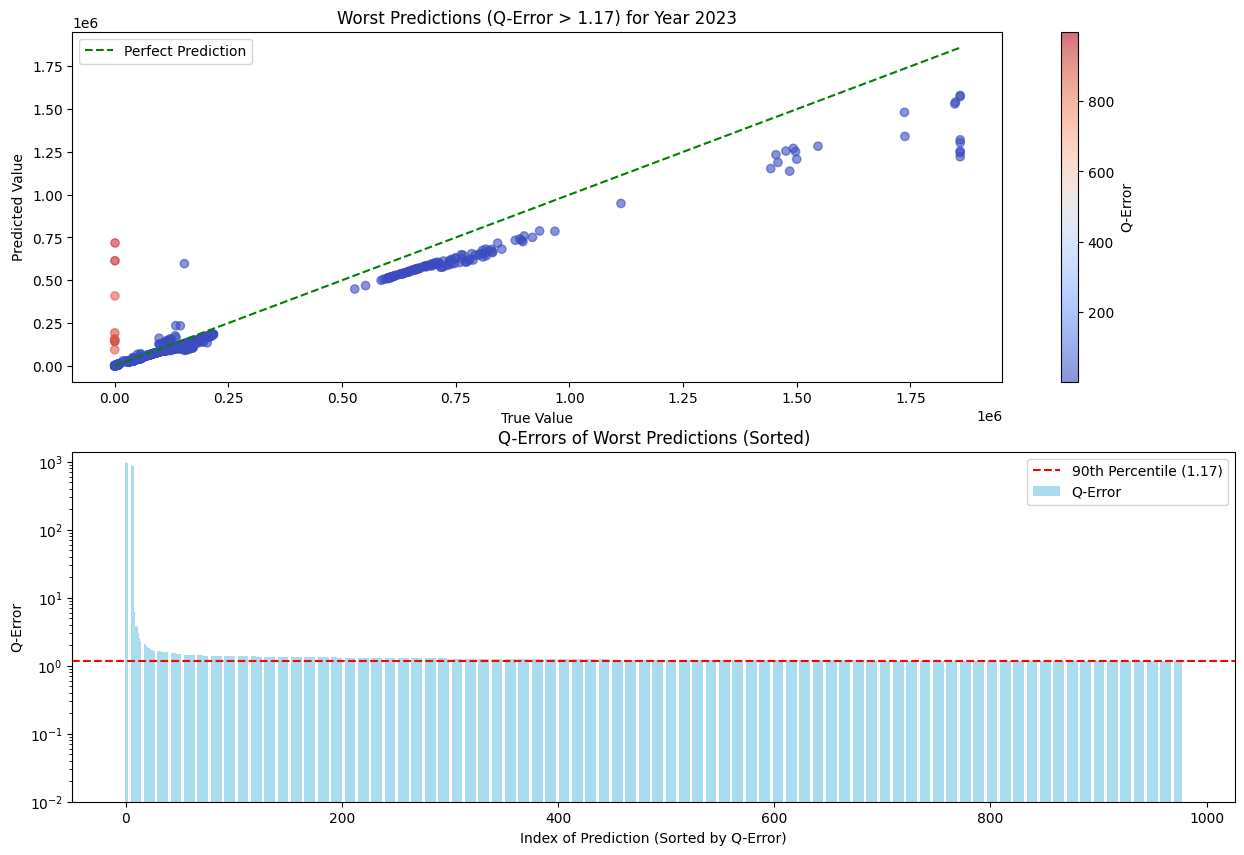


Worst Predictions Analysis for Year 2023
Number of predictions above 90th percentile: 978
Q-Error threshold: 1.17

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
5                143.0  142735.85   998.15
5                634.0  614374.81   969.05
5                754.0  718132.31   952.43
5                211.0  192484.22   912.25
5                173.0  156813.29   906.44
5                169.0  148995.24   881.63
5                108.0   94093.79   871.24
5                470.0  408700.64   869.58
5                138.0     846.19     6.13
5             153330.0  597052.29     3.89
Model Metrics:
RMSE: 4629569928.2063, MAE: 43847.5782, R^2: 0.9763

Year 2024 Metrics:
RMSE: 4629569928.2063, MAE: 43847.5782, R^2: 0.9763


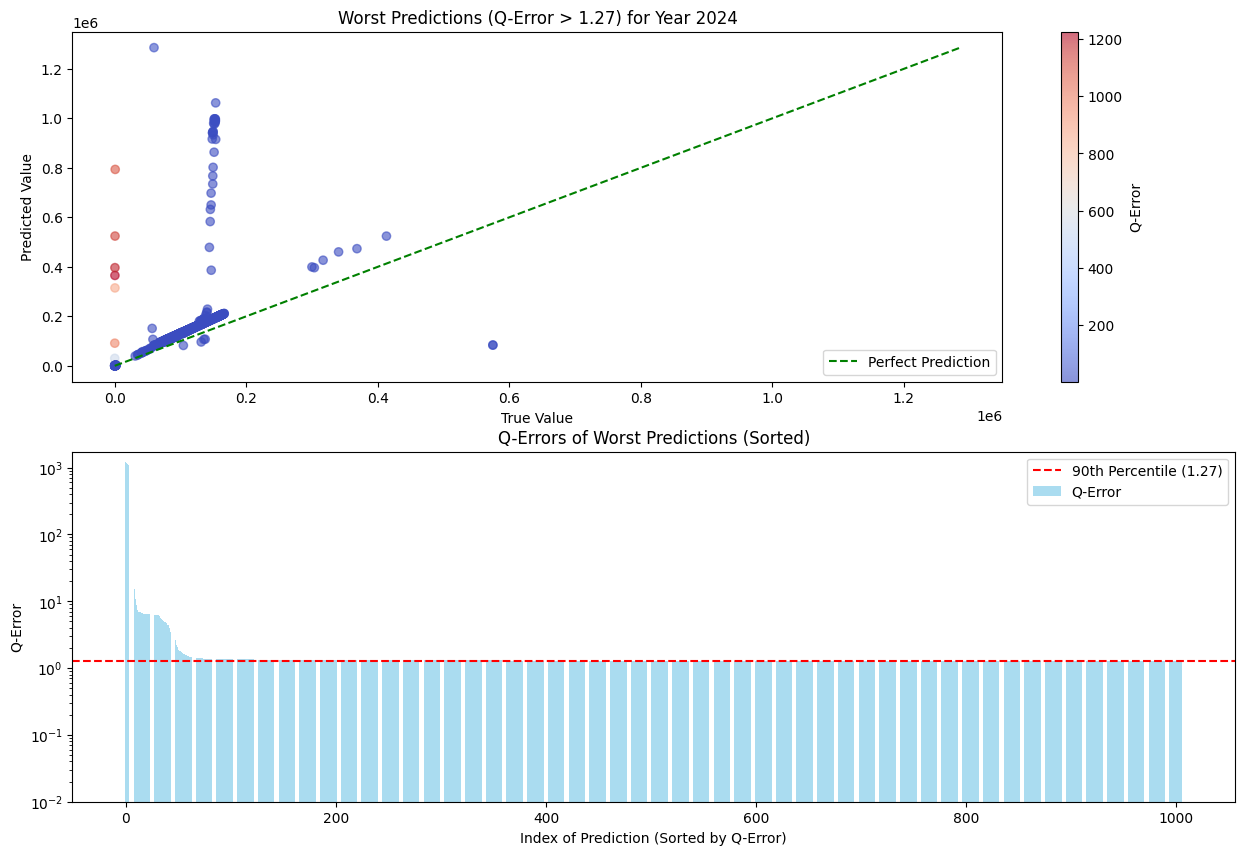


Worst Predictions Analysis for Year 2024
Number of predictions above 90th percentile: 1006
Q-Error threshold: 1.27

Top 10 Worst Predictions:
            True Value   Predicted  Q-Error
year_index                                 
6               298.00   365297.55  1225.83
6               334.00   396716.43  1187.77
6               464.00   524456.15  1130.29
6               728.00   793776.05  1090.35
6                94.00    91518.81   973.60
6               364.00   314841.53   864.95
6                55.00    30267.93   550.33
6             59752.31  1285932.42    21.52
6                24.00      359.98    15.00
6                31.00      340.64    10.99

Visualization of Q-Errors:


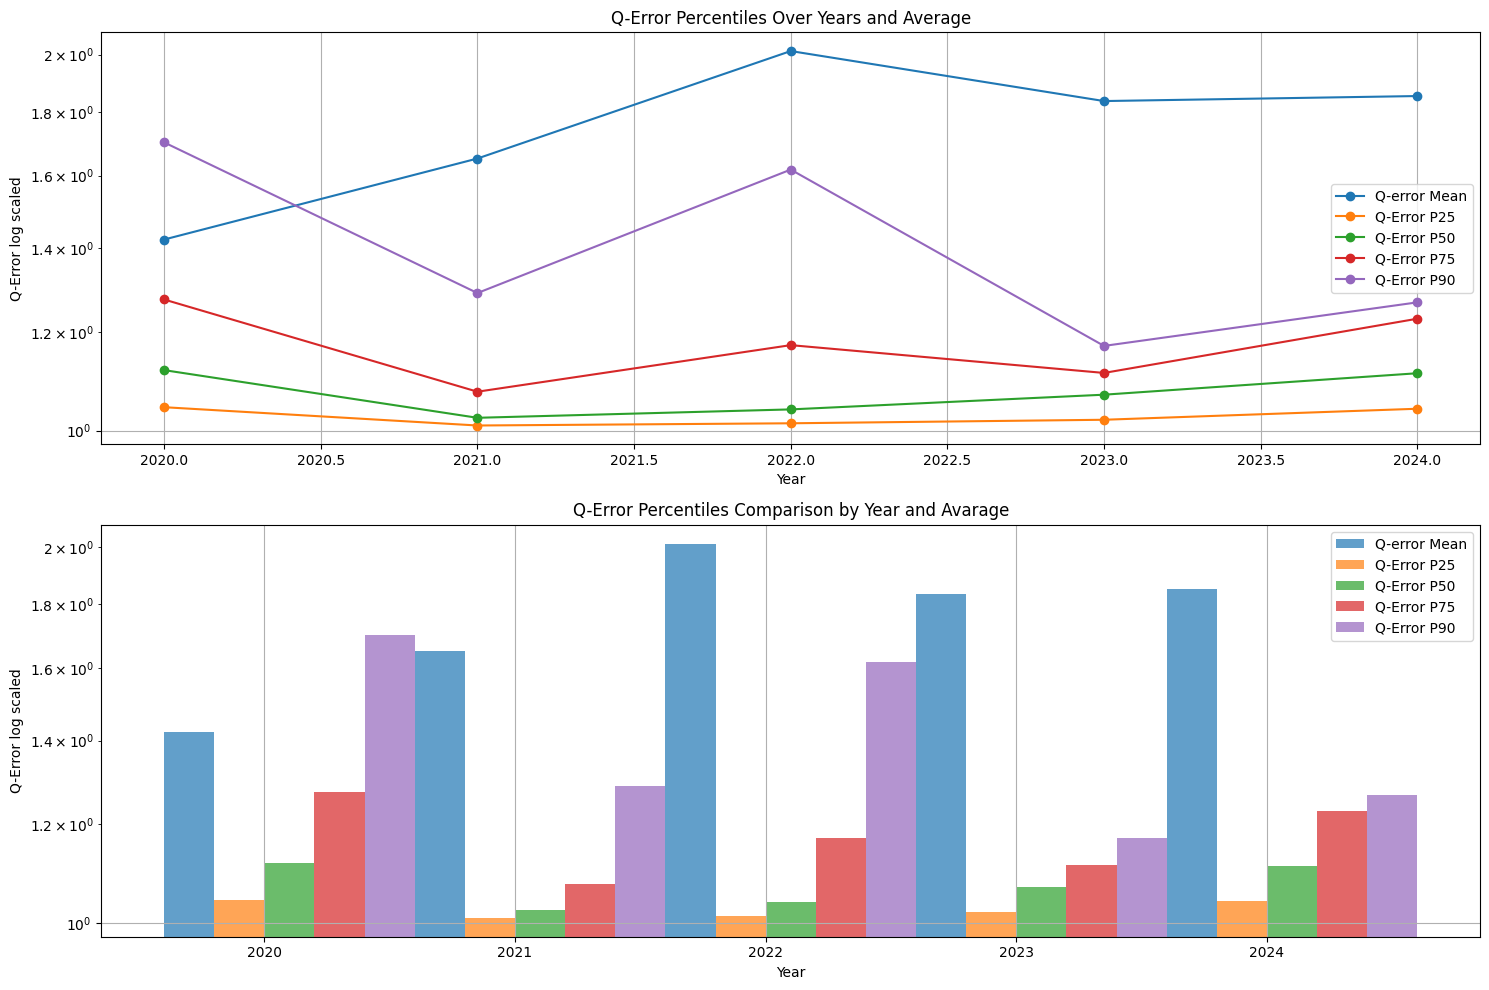

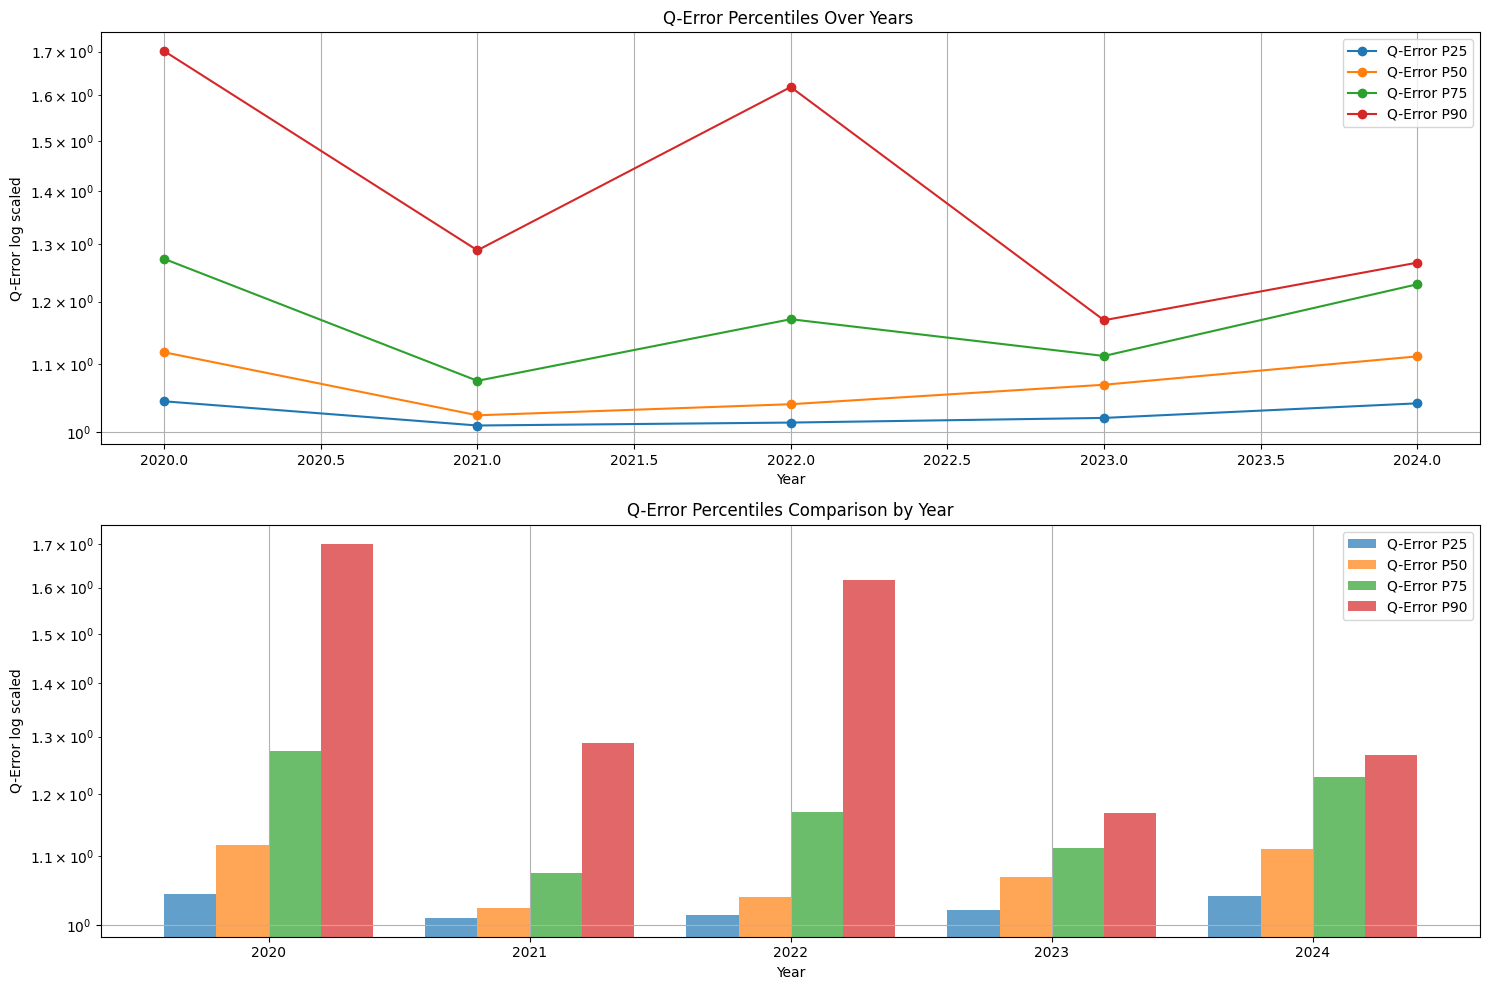


Visualization of Model Performance:


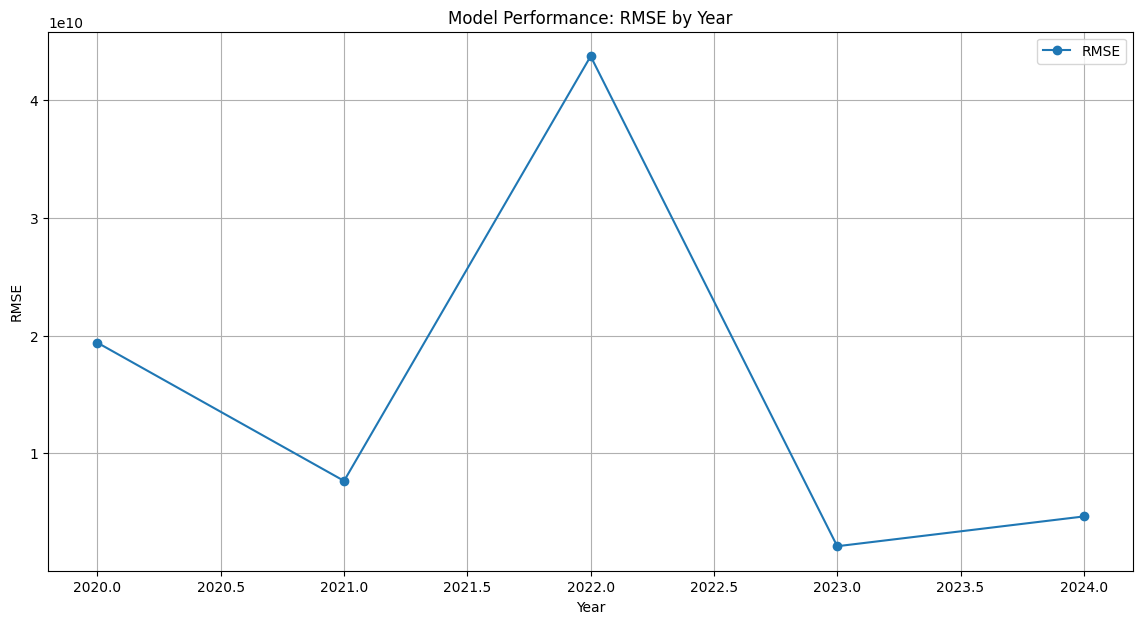

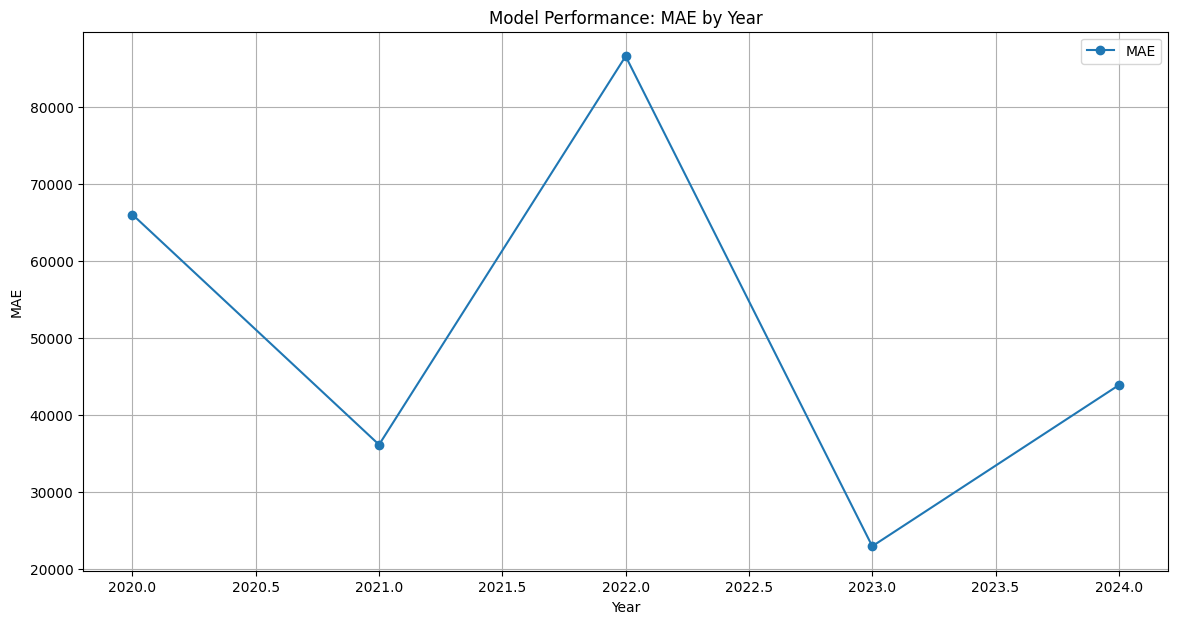

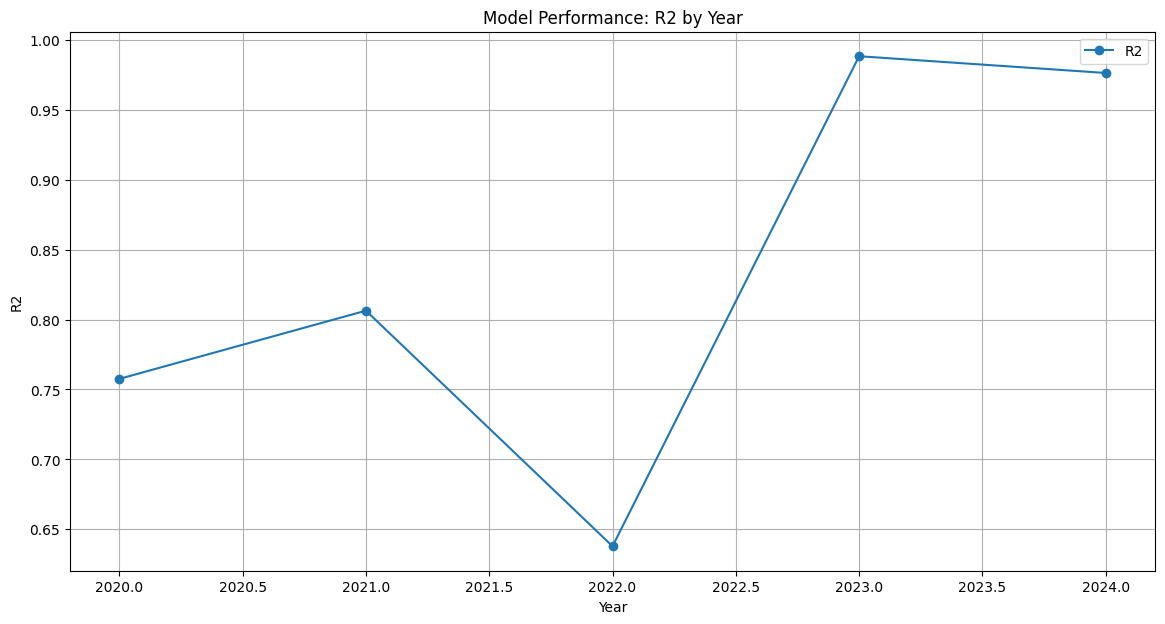

In [18]:
random_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_metrics = {}
random_metrics_qerror = {}
random_model_year = {}
worst_predictions_by_year = {}  # To store worst predictions analysis

for i in range(1, len(x_year)):
    year = 2020+i-1
    random_model, pred = train(random_model, x_year[i-1], y_year[i-1], x_year[i])
    rmse, mae, r2 = evaluate(y_year[i], pred)
    
    # Store basic metrics
    random_metrics[year] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    random_metrics_qerror[year] = evaluate_with_qerror(y_year[i], pred)
    random_model_year[year] = random_model
    
    print(f"\nYear {year} Metrics:")
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    
    # Analyze and visualize worst predictions
    worst_predictions_df = visualize_worst_predictions(y_year[i], pred, year)
    worst_predictions_by_year[year] = worst_predictions_df
    
# Visualize Q-Errors and model performance
metrics_df_qerror = pd.DataFrame(random_metrics_qerror).T
metrics_df = pd.DataFrame(random_metrics).T

print("\nVisualization of Q-Errors:")
visualize_qerrors(metrics_df_qerror)

print("\nVisualization of Model Performance:")
visualize_model_performance(metrics_df)


Model Metrics:
RMSE: 19971571322.0858, MAE: 68626.5580, R^2: 0.7502

Year 2020 Metrics:
RMSE: 19971571322.0858, MAE: 68626.5580, R^2: 0.7502


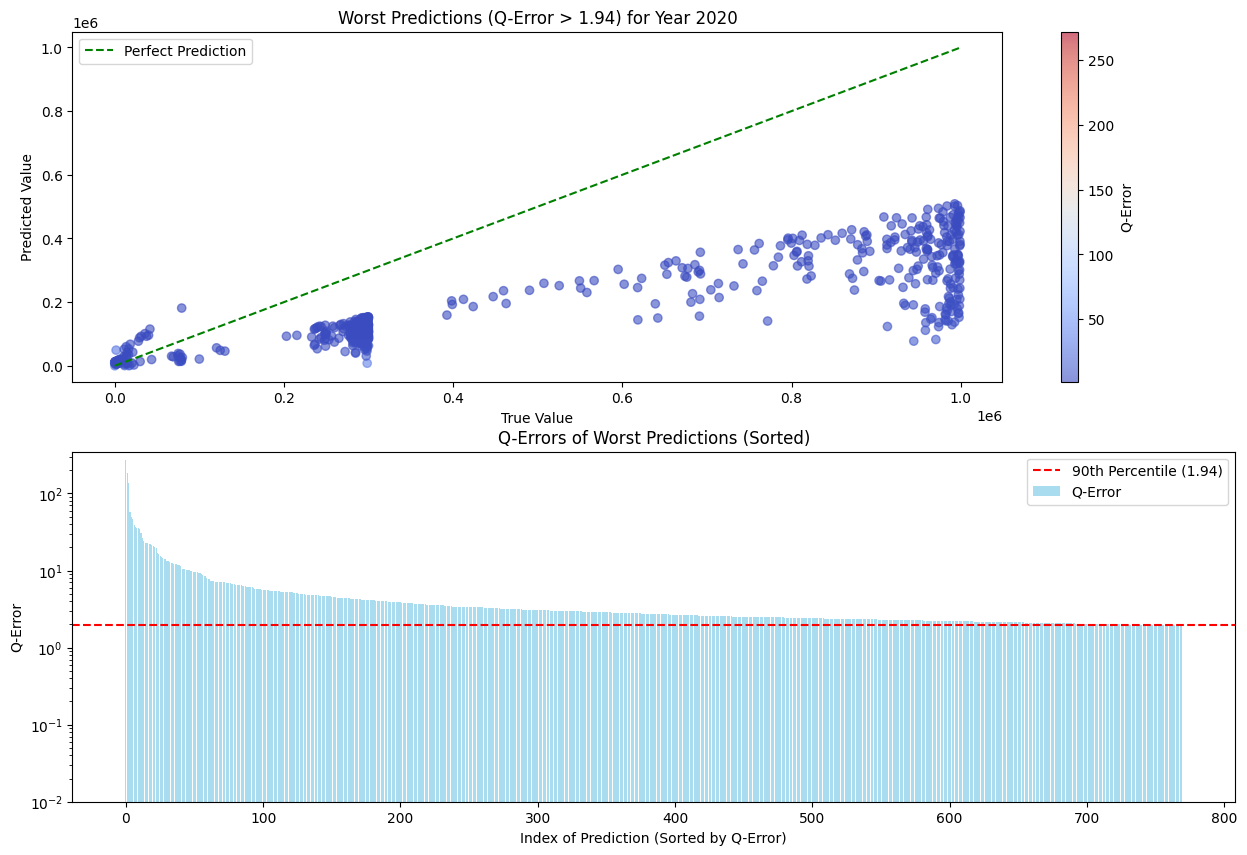


Worst Predictions Analysis for Year 2020
Number of predictions above 90th percentile: 770
Q-Error threshold: 1.94

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
2                 37.0   10052.96   271.70
2                 48.0    8753.43   182.36
2                 82.0   11327.16   138.14
2                178.0   10262.18    57.65
2                190.0    9501.48    50.01
2              16233.0     346.53    46.84
2                 91.0       2.35    38.71
2             298375.0    8218.74    36.30
2                267.0    9501.48    35.59
2                321.0   11327.16    35.29
Model Metrics:
RMSE: 2257630445.1957, MAE: 23790.9610, R^2: 0.9428

Year 2021 Metrics:
RMSE: 2257630445.1957, MAE: 23790.9610, R^2: 0.9428


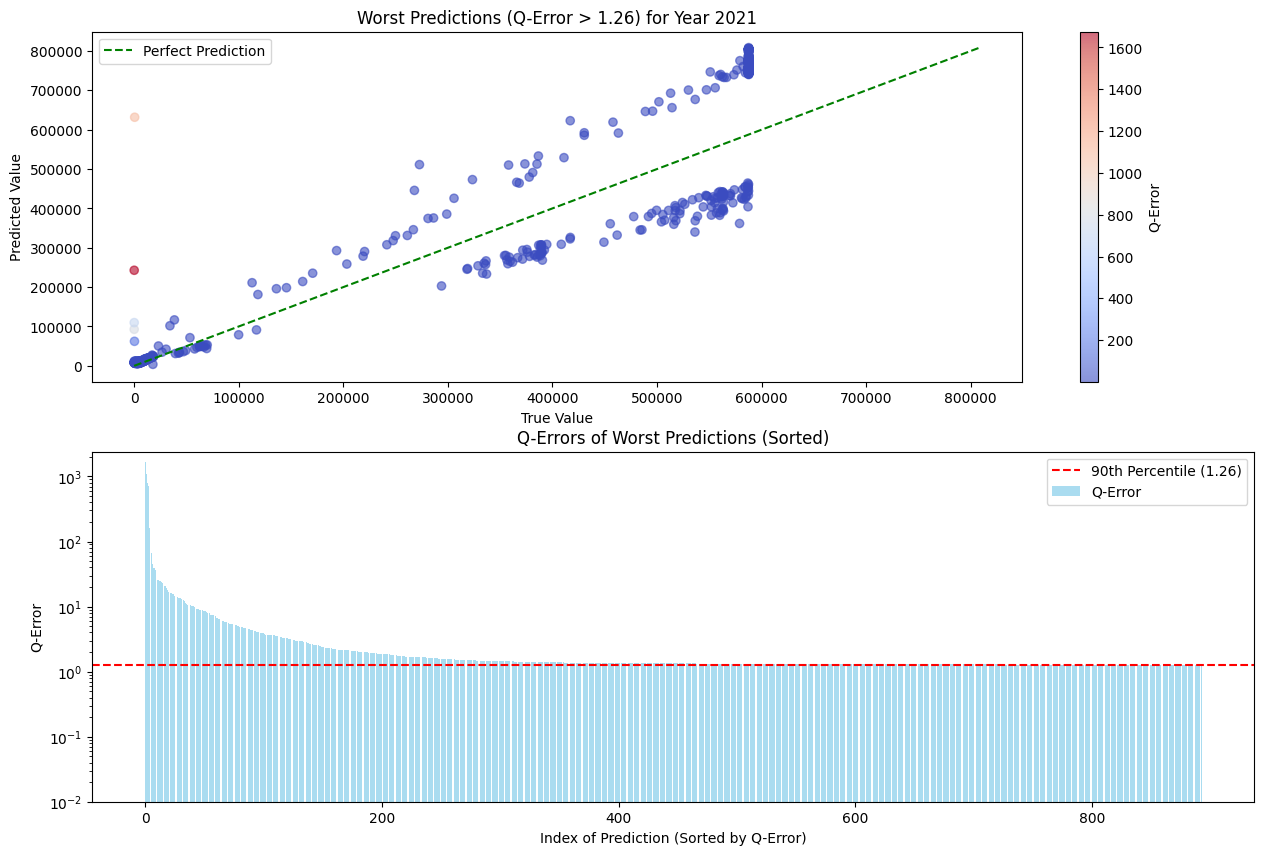


Worst Predictions Analysis for Year 2021
Number of predictions above 90th percentile: 893
Q-Error threshold: 1.26

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
3                145.0  242871.41  1674.98
3                586.0  631646.51  1077.90
3                116.0   92908.48   800.94
3                154.0  109883.75   713.53
3                390.0   62349.59   159.87
3                180.0   11845.55    65.81
3                180.0    8202.16    45.57
3                207.0    8202.16    39.62
3                213.0    8202.16    38.51
3                221.0    8202.16    37.11
Model Metrics:
RMSE: 80318892938.9653, MAE: 110992.0636, R^2: 0.3349

Year 2022 Metrics:
RMSE: 80318892938.9653, MAE: 110992.0636, R^2: 0.3349


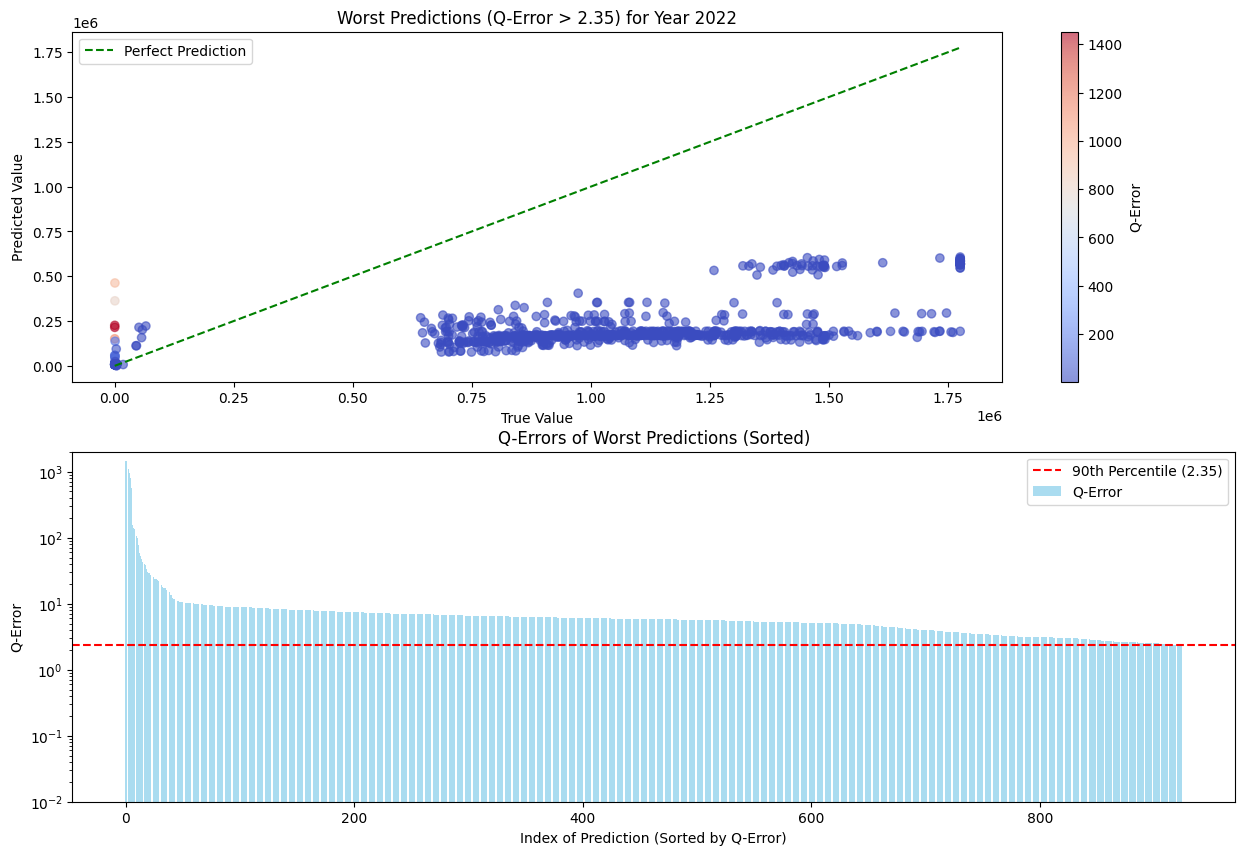


Worst Predictions Analysis for Year 2022
Number of predictions above 90th percentile: 925
Q-Error threshold: 2.35

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
4                148.0  214868.71  1451.82
4                156.0  226056.00  1449.08
4                136.0  151025.77  1110.48
4                490.0  462594.93   944.07
4                455.0  362858.63   797.49
4                106.0   59323.42   559.65
4                872.0  137349.72   157.51
4                410.0   57512.49   140.27
4                420.0   57512.49   136.93
4                490.0   52187.70   106.51
Model Metrics:
RMSE: 3460576254.2083, MAE: 29695.6954, R^2: 0.9806

Year 2023 Metrics:
RMSE: 3460576254.2083, MAE: 29695.6954, R^2: 0.9806


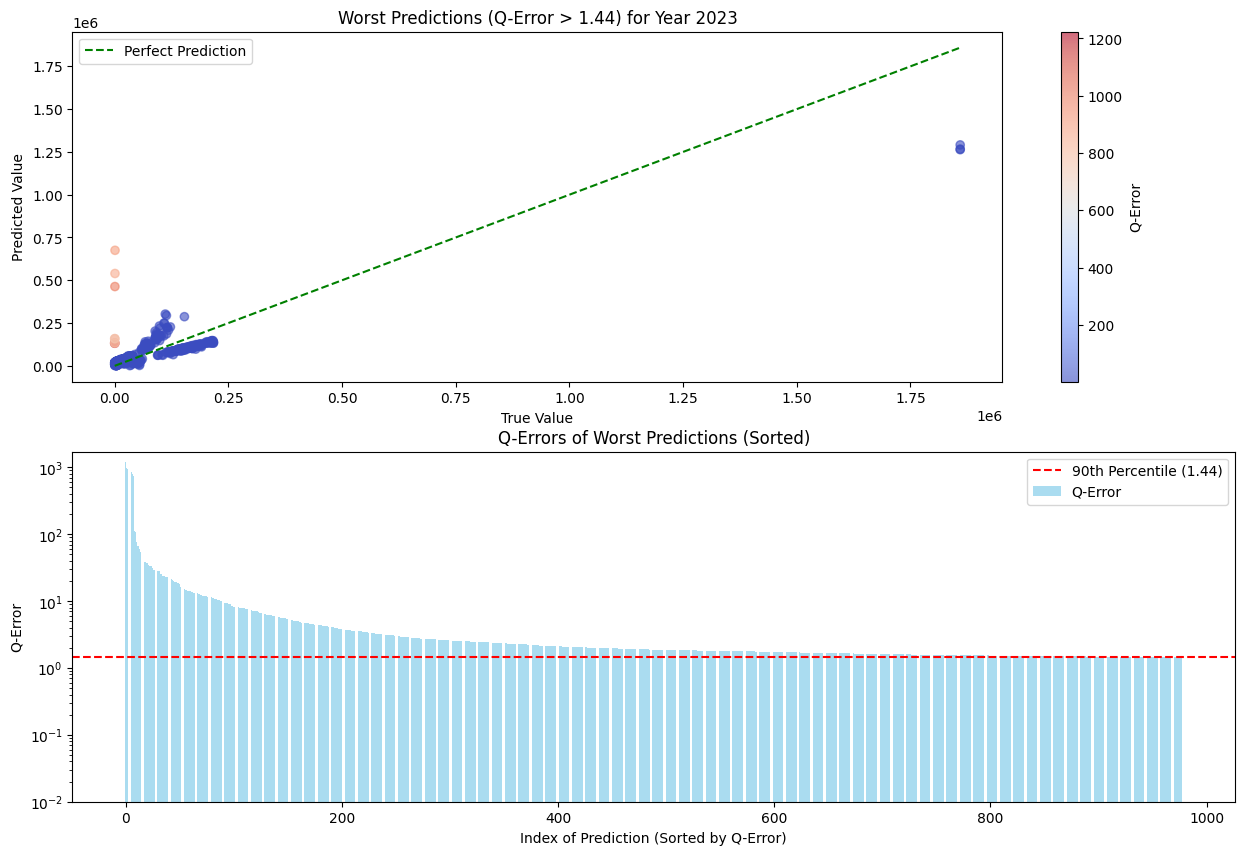


Worst Predictions Analysis for Year 2023
Number of predictions above 90th percentile: 978
Q-Error threshold: 1.44

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
5                108.0  132116.21  1223.30
5                470.0  463310.20   985.77
5                143.0  133241.89   931.76
5                173.0  158570.57   916.59
5                754.0  675068.21   895.32
5                634.0  539620.93   851.14
5                169.0  133433.53   789.55
5                211.0  158514.61   751.25
5                163.0   18368.86   112.69
5                172.0   18368.86   106.80
Model Metrics:
RMSE: 2856893603.1605, MAE: 37666.0165, R^2: 0.9854

Year 2024 Metrics:
RMSE: 2856893603.1605, MAE: 37666.0165, R^2: 0.9854


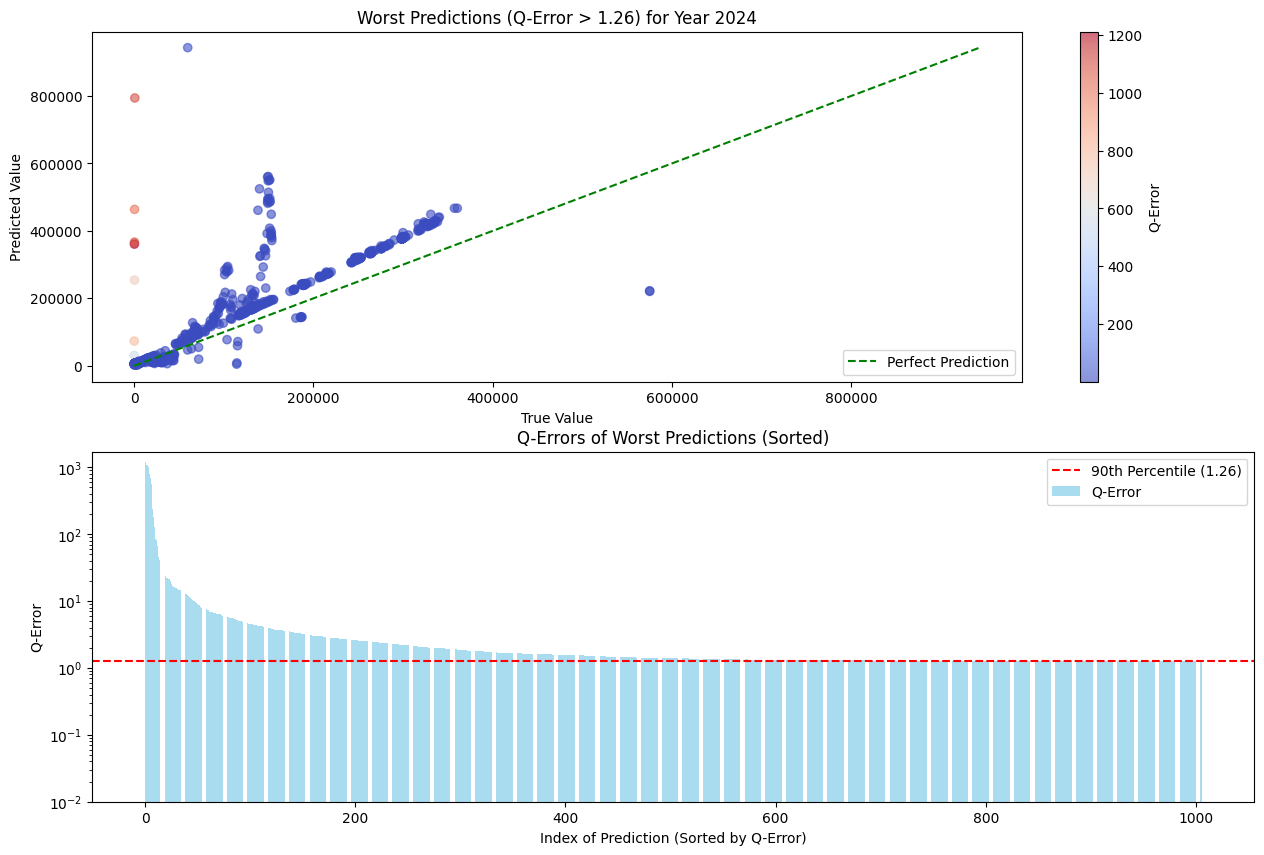


Worst Predictions Analysis for Year 2024
Number of predictions above 90th percentile: 1006
Q-Error threshold: 1.26

Top 10 Worst Predictions:
            True Value  Predicted  Q-Error
year_index                                
6                298.0  360779.33  1210.67
6                334.0  366441.33  1097.13
6                728.0  794040.17  1090.71
6                464.0  463730.53   999.42
6                 94.0   73403.10   780.88
6                364.0  254144.91   698.20
6                 55.0   30928.63   562.34
6                 24.0    5617.97   234.08
6                 31.0    5617.97   181.22
6                 43.0    5444.28   126.61

Visualization of Q-Errors:


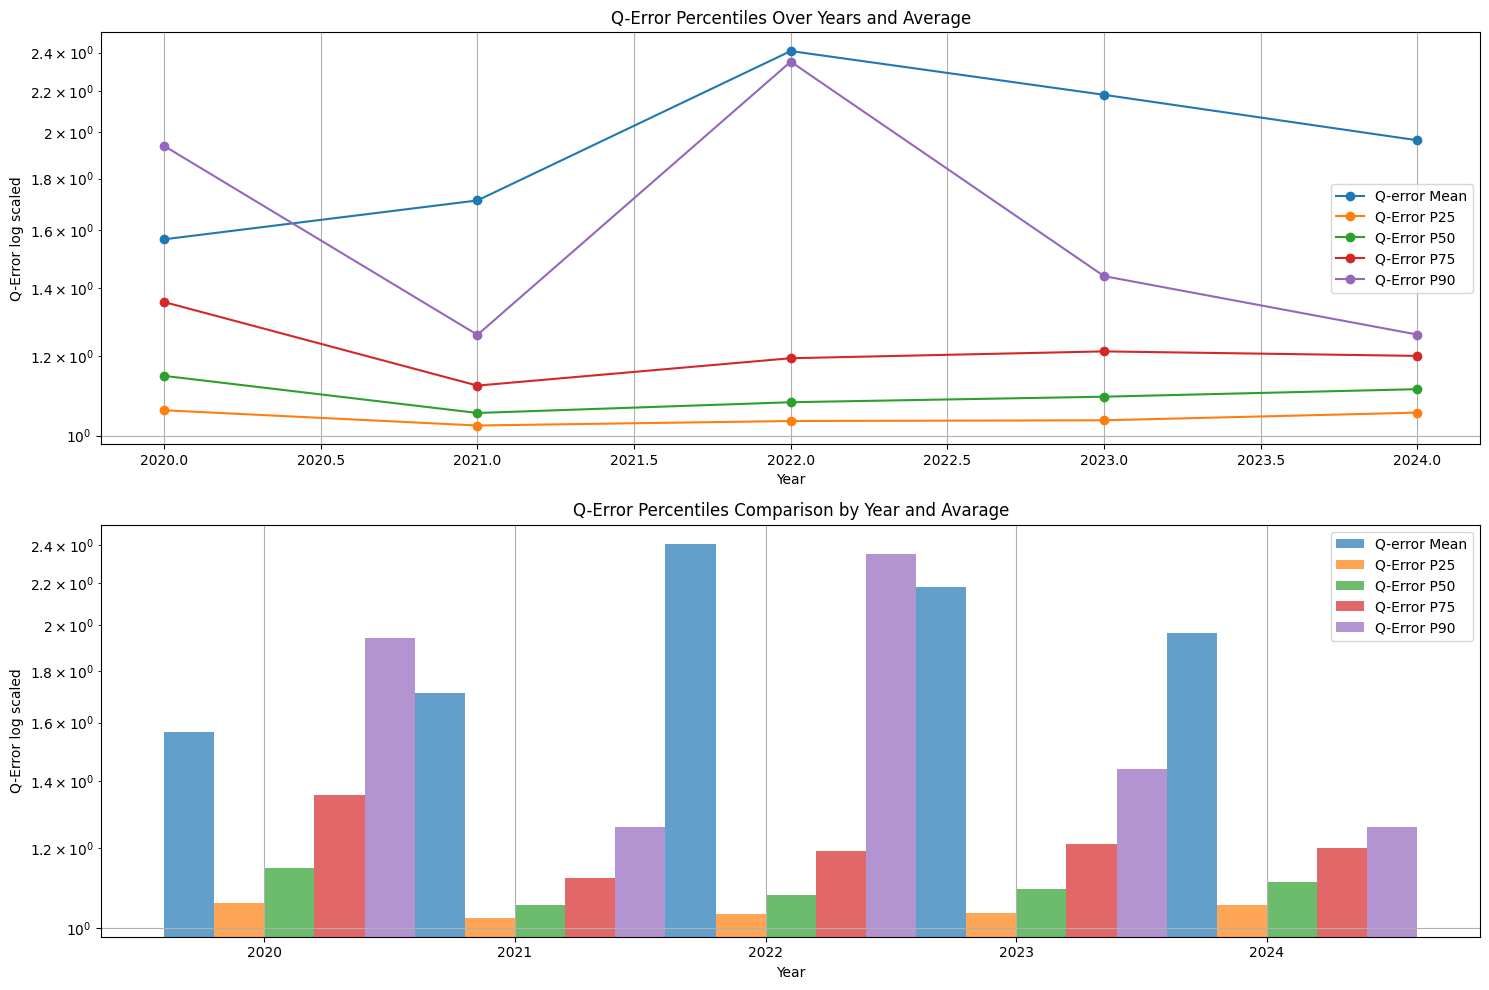

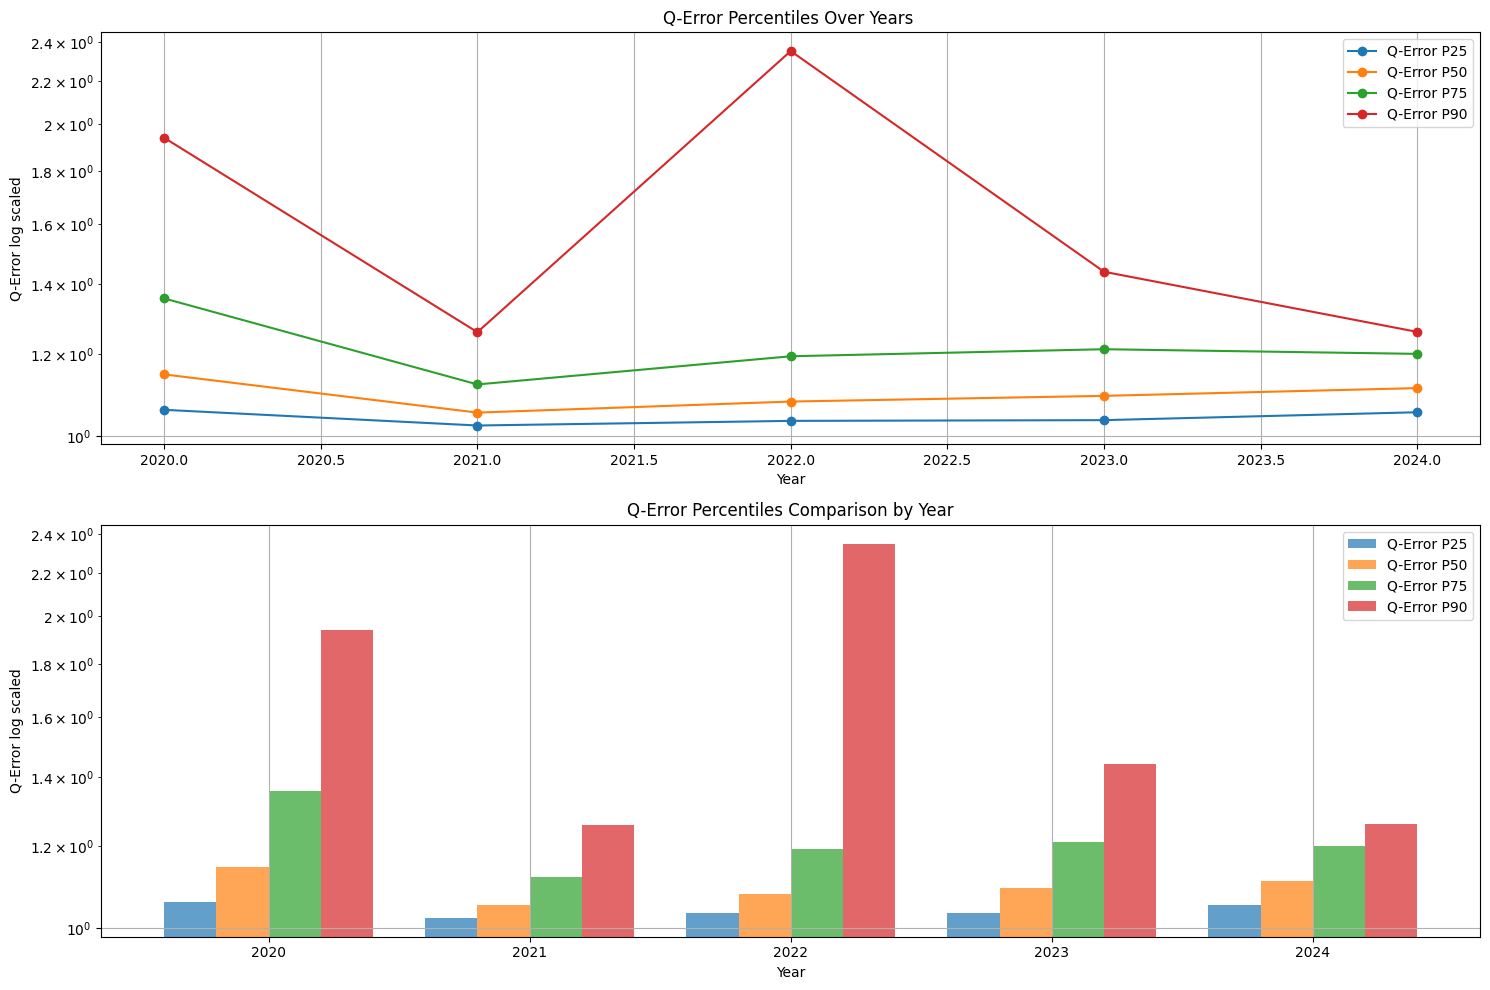


Visualization of Model Performance:


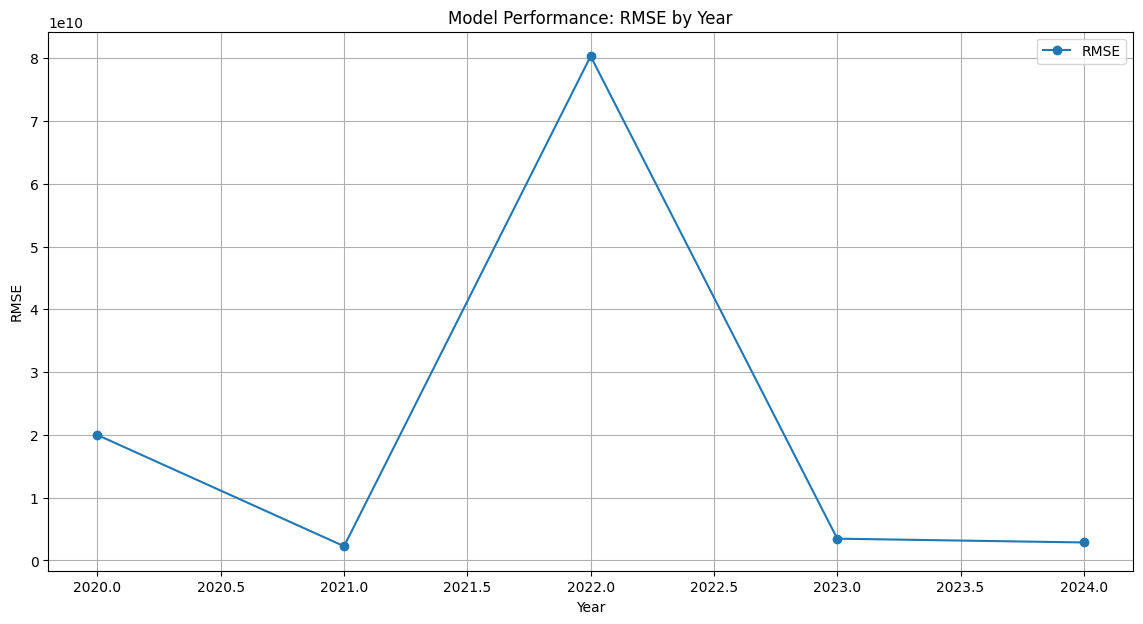

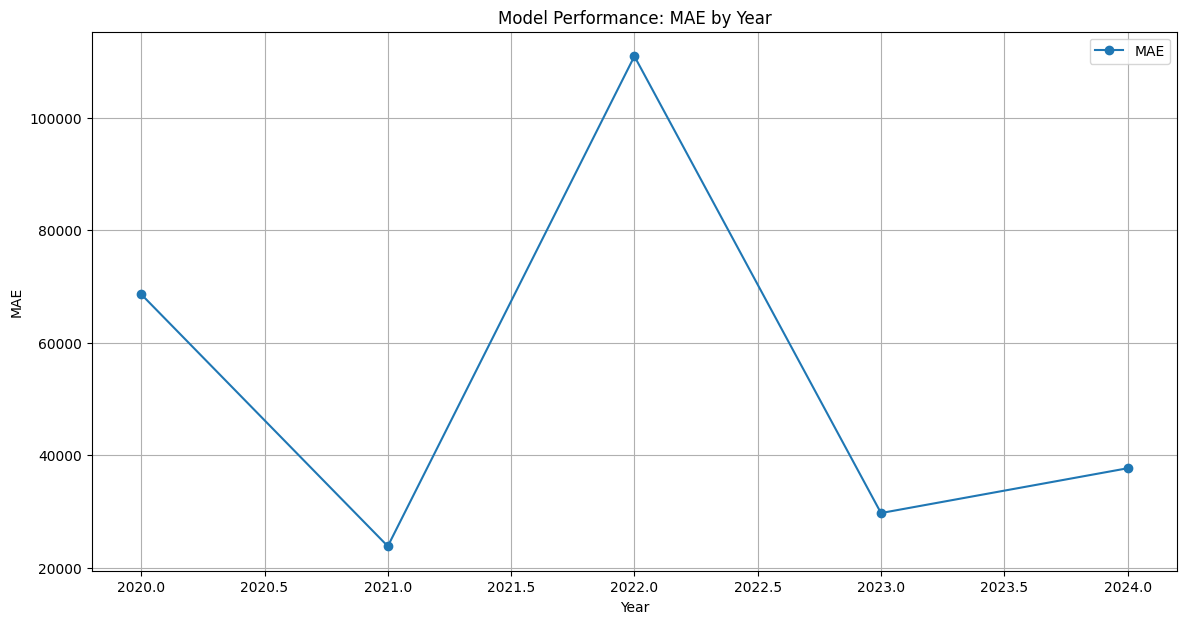

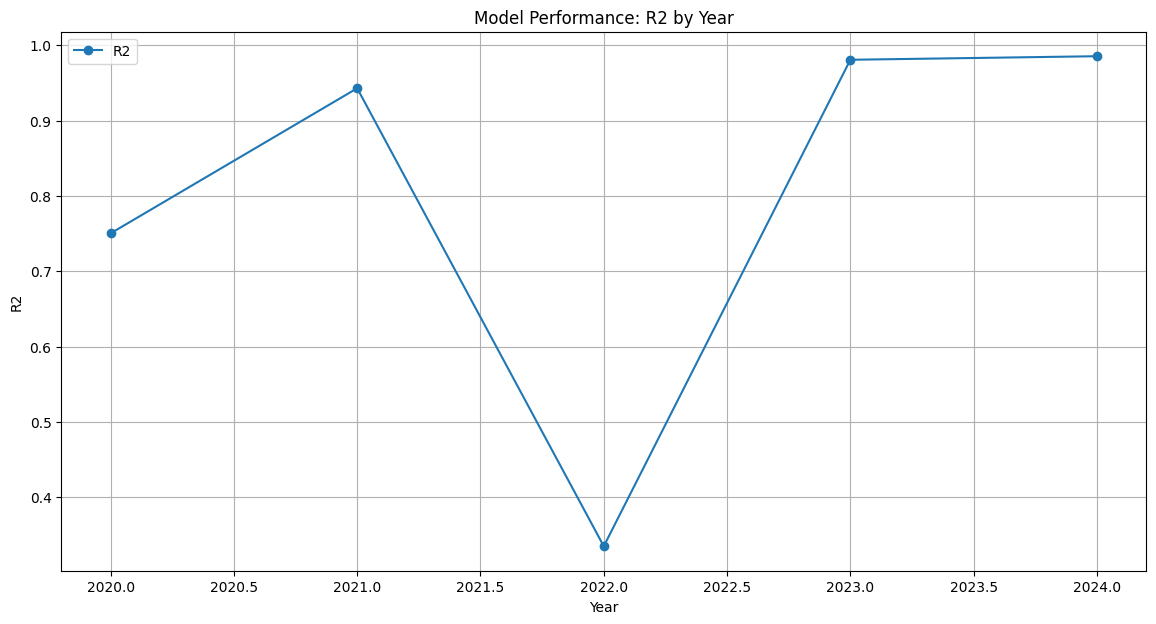

In [19]:
gradient_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_metrics = {}
gradient_metrics_qerror = {}
gradient_model_year = {}
worst_predictions_df = {}

for i in range(1, len(x_year)):
    year = 2020+i-1
    gradient_model, pred = train(gradient_model, x_year[i-1], y_year[i-1], x_year[i])
    rmse, mae, r2 = evaluate(y_year[i], pred)
    
    # Store basic metrics
    gradient_metrics[year] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    gradient_metrics_qerror[year] = evaluate_with_qerror(y_year[i], pred)
    gradient_model_year[year] = gradient_model
    
    print(f"\nYear {year} Metrics:")
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    
    # Analyze and visualize worst predictions
    worst_predictions_df = visualize_worst_predictions(y_year[i], pred, year)
    worst_predictions_by_year[year] = worst_predictions_df
    
# Visualize Q-Errors and model performance
metrics_df_qerror = pd.DataFrame(gradient_metrics_qerror).T
metrics_df = pd.DataFrame(gradient_metrics).T

print("\nVisualization of Q-Errors:")
visualize_qerrors(metrics_df_qerror)

print("\nVisualization of Model Performance:")
visualize_model_performance(metrics_df)





/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 80350.5953, MAE: 38005.9773, R^2: 0.9172
Year 2019 Metrics:
RMSE: 80350.5953, MAE: 38005.9773, R^2: 0.9172


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 69127.3783, MAE: 31572.9174, R^2: 0.8647
Year 2020 Metrics:
RMSE: 69127.3783, MAE: 31572.9174, R^2: 0.8647


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 208368.7251, MAE: 94218.8451, R^2: 0.6132
Year 2021 Metrics:
RMSE: 208368.7251, MAE: 94218.8451, R^2: 0.6132


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 41373.4600, MAE: 18537.5119, R^2: 0.9888
Year 2022 Metrics:
RMSE: 41373.4600, MAE: 18537.5119, R^2: 0.9888
Model Metrics:
RMSE: 72502.1124, MAE: 43823.2148, R^2: 0.9676
Year 2023 Metrics:
RMSE: 72502.1124, MAE: 43823.2148, R^2: 0.9676


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


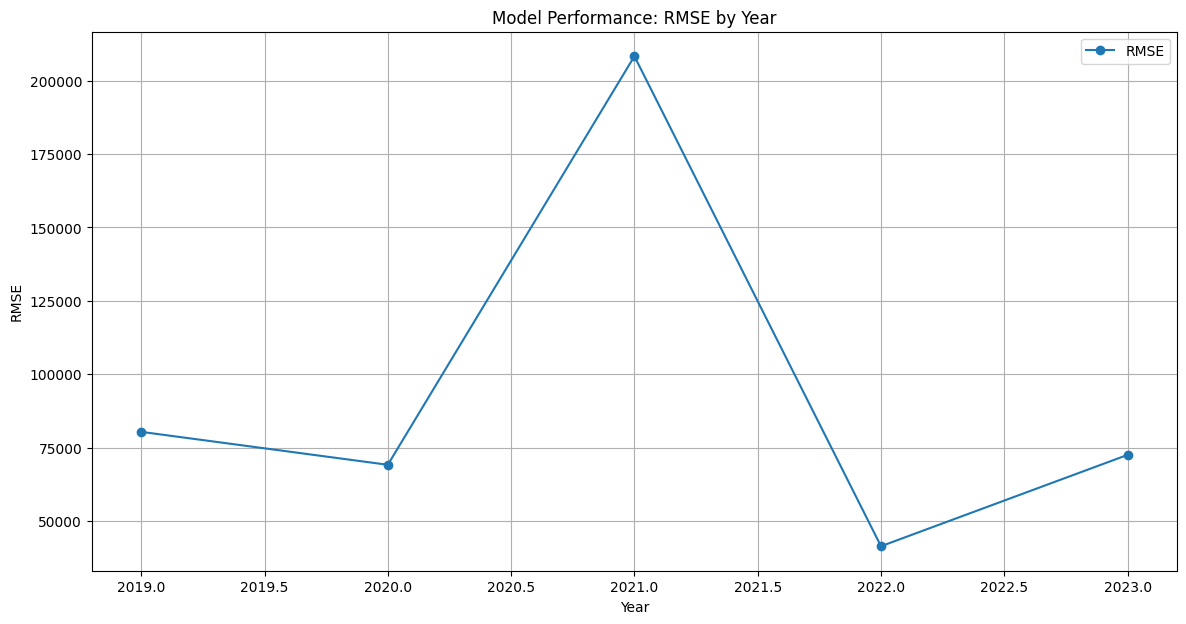

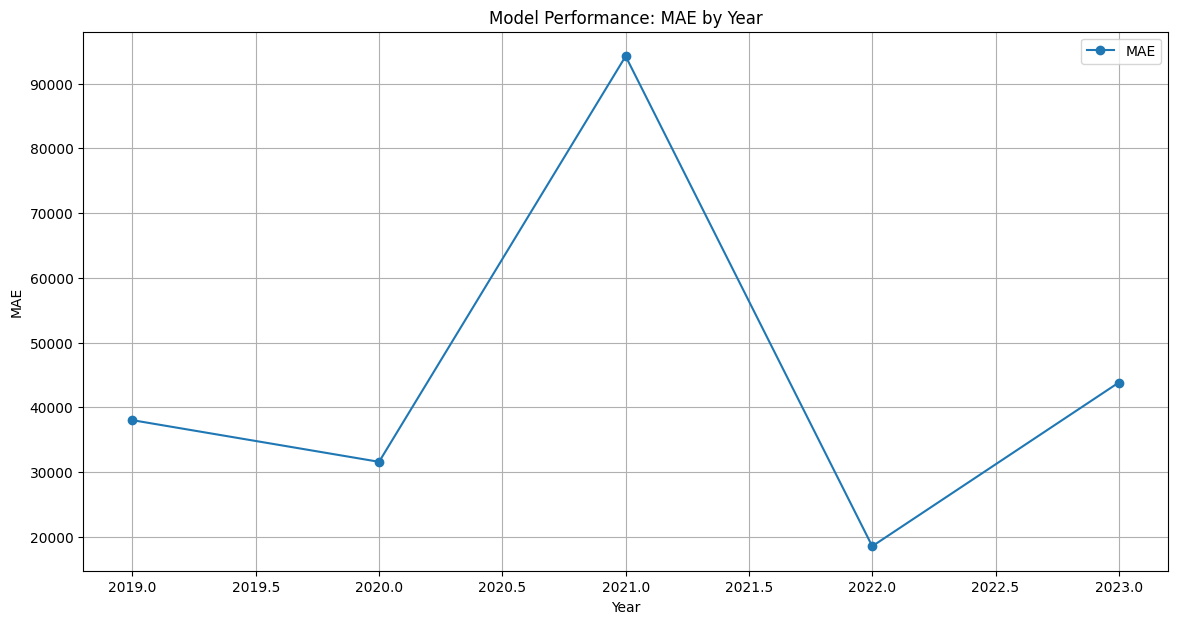

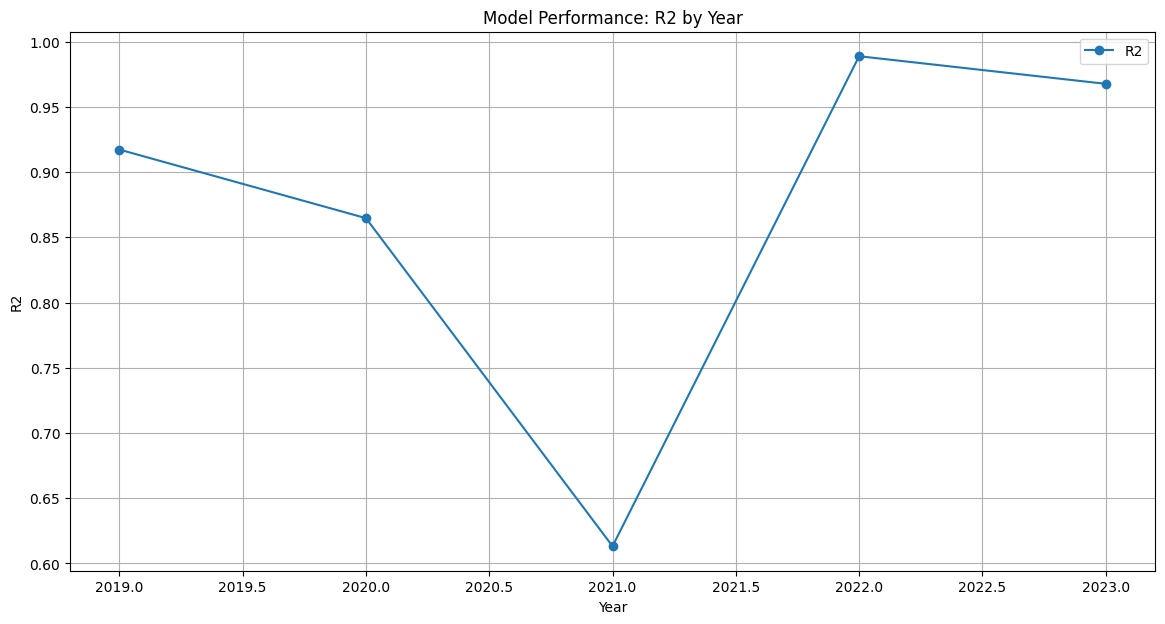

In [35]:
decision_model = DecisionTreeRegressor()
decision_metrics = {}
decision_model_year = {}

for i in range(1, len(x_year)):
    year = 2019+i-1
    decision_model, pred = train(decision_model, x_year[i-1], y_year[i-1], x_year[i])
    rmse, mae, r2 = evaluate(y_year[i], pred)
    decision_metrics[year] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    decision_model_year[year] = decision_model
    
    print(f"Year {2019+i-1} Metrics:\nRMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

metrics_df_decision = pd.DataFrame(decision_metrics).T
visualize_model_performance(metrics_df_decision)


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 101820.0267, MAE: 64178.6113, R^2: 0.8671
Year 2019 Metrics:
RMSE: 101820.0267, MAE: 64178.6113, R^2: 0.8671


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 92192.2414, MAE: 57437.7134, R^2: 0.7593
Year 2020 Metrics:
RMSE: 92192.2414, MAE: 57437.7134, R^2: 0.7593


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 205044.9290, MAE: 102006.3427, R^2: 0.6255
Year 2021 Metrics:
RMSE: 205044.9290, MAE: 102006.3427, R^2: 0.6255


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 167984.1695, MAE: 80886.5169, R^2: 0.8147
Year 2022 Metrics:
RMSE: 167984.1695, MAE: 80886.5169, R^2: 0.8147


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 211446.2894, MAE: 131550.3395, R^2: 0.7244
Year 2023 Metrics:
RMSE: 211446.2894, MAE: 131550.3395, R^2: 0.7244


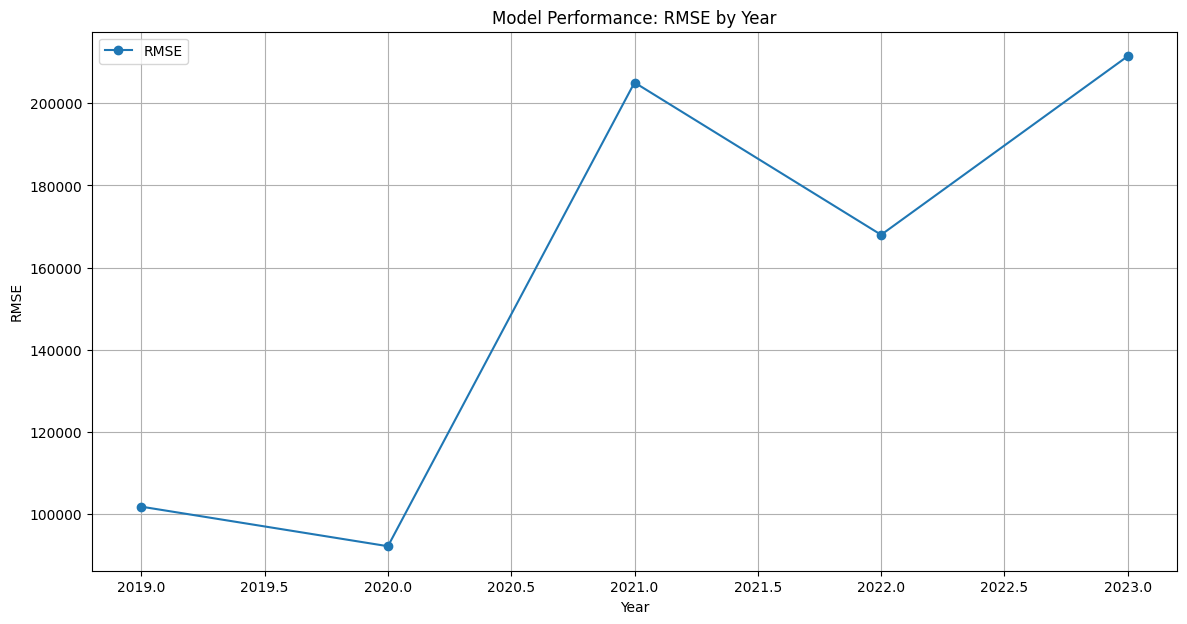

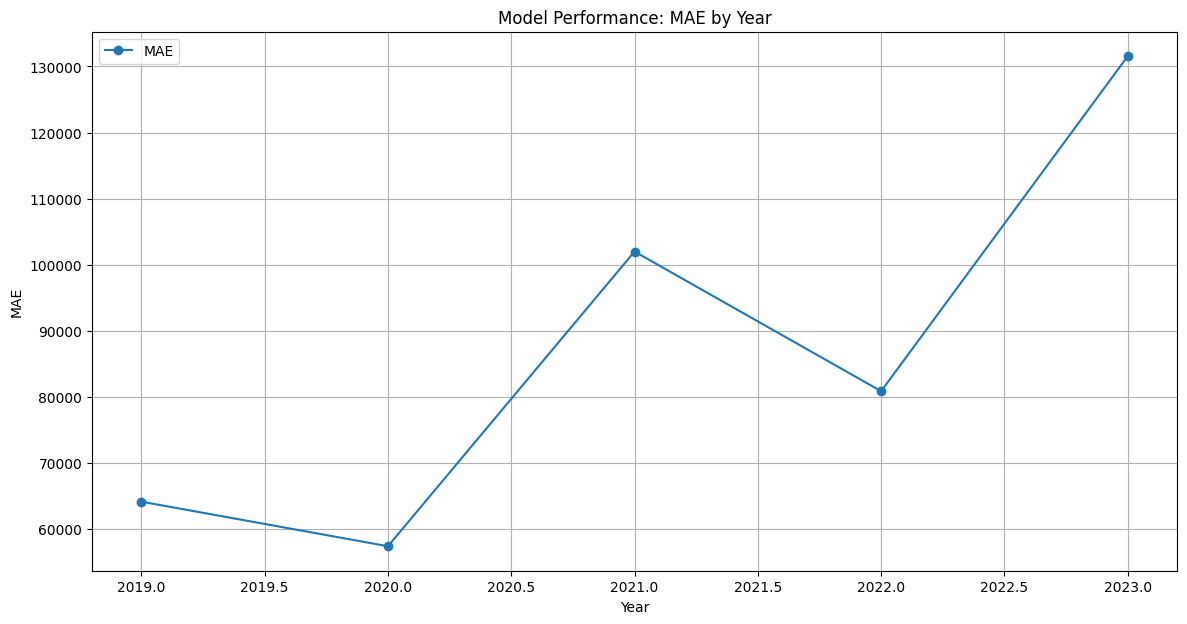

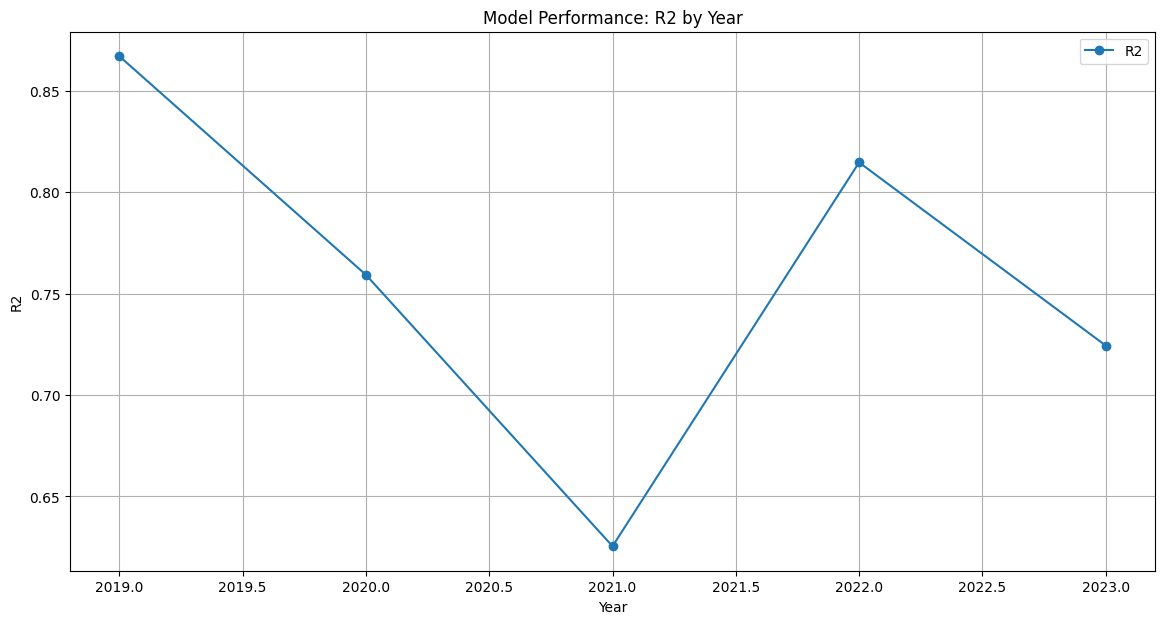

In [36]:
knn_model = KNeighborsRegressor()
knn_metrics = {}
knn_model_year = {}

for i in range(1, len(x_year)):
    year = 2019+i-1
    knn_model, pred = train(knn_model, x_year[i-1], y_year[i-1], x_year[i])
    rmse, mae, r2 = evaluate(y_year[i], pred)
    knn_metrics[year] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    knn_model_year[year] = knn_model
    
    print(f"Year {2019+i-1} Metrics:\nRMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

metrics_df_knn = pd.DataFrame(knn_metrics).T
visualize_model_performance(metrics_df_knn)

/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.825e+12, tolerance: 5.926e+10
  model = cd_fast.enet_coordinate_descent(
/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 21673.1653, MAE: 11389.8900, R^2: 0.9940
Year 2019 Metrics:
RMSE: 21673.1653, MAE: 11389.8900, R^2: 0.9940


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 33295.9314, MAE: 449.3514, R^2: 0.9686
Year 2020 Metrics:
RMSE: 33295.9314, MAE: 449.3514, R^2: 0.9686


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 10606.6793, MAE: 1196.2685, R^2: 0.9990
Year 2021 Metrics:
RMSE: 10606.6793, MAE: 1196.2685, R^2: 0.9990


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.030e+11, tolerance: 1.033e+11
  model = cd_fast.enet_coordinate_descent(
/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 10307.4125, MAE: 927.3502, R^2: 0.9993
Year 2022 Metrics:
RMSE: 10307.4125, MAE: 927.3502, R^2: 0.9993


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.074e+11, tolerance: 1.470e+11
  model = cd_fast.enet_coordinate_descent(
/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Metrics:
RMSE: 135750.6957, MAE: 15089.0338, R^2: 0.8864
Year 2023 Metrics:
RMSE: 135750.6957, MAE: 15089.0338, R^2: 0.8864


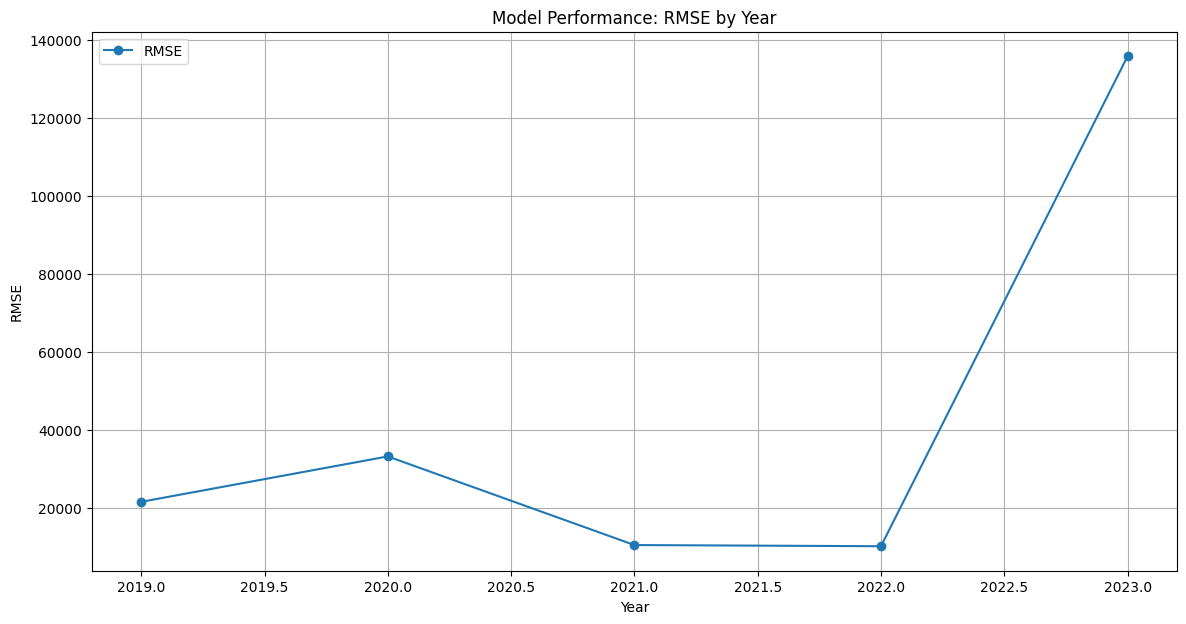

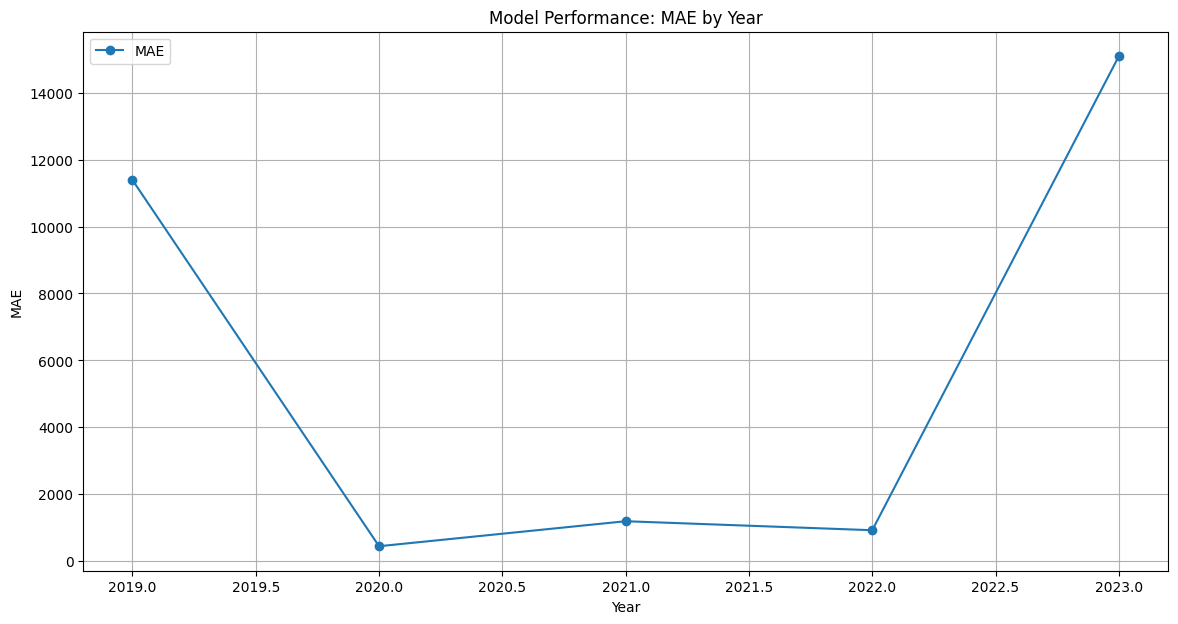

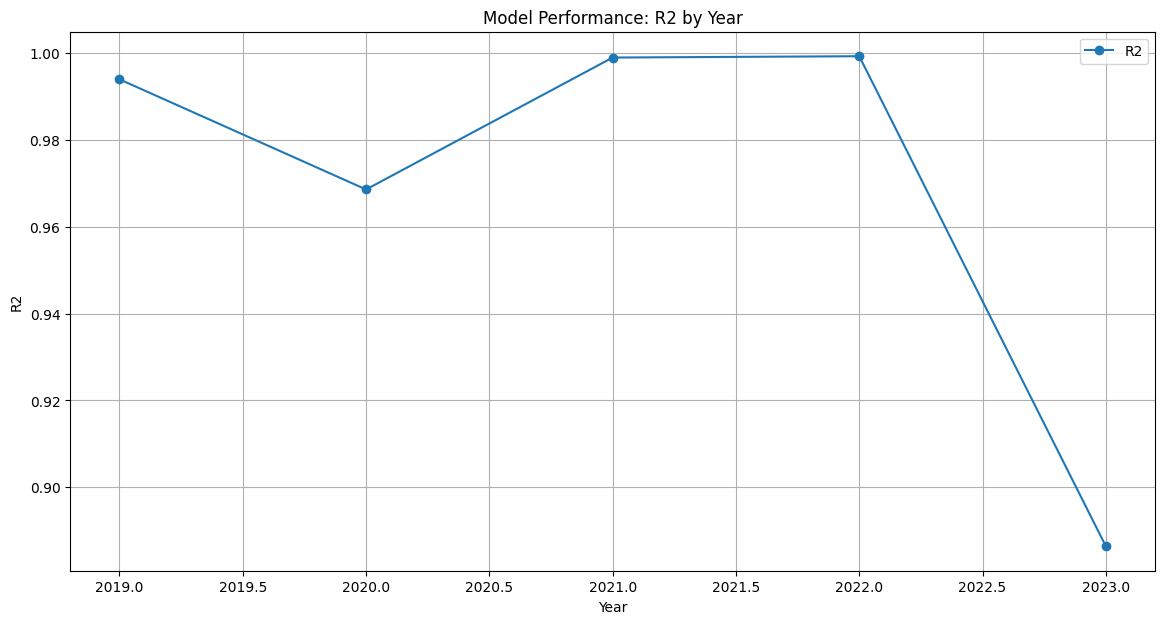

In [37]:
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_metrics = {}
elastic_model_year = {}

for i in range(1, len(x_year)):
    year = 2019+i-1
    elastic_model, pred = train(elastic_model, x_year[i-1], y_year[i-1], x_year[i])
    rmse, mae, r2 = evaluate(y_year[i], pred)
    elastic_metrics[year] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    elastic_model_year[year] = elastic_model
    
    print(f"Year {2019+i-1} Metrics:\nRMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

metrics_df_elastic = pd.DataFrame(elastic_metrics).T
visualize_model_performance(metrics_df_elastic)


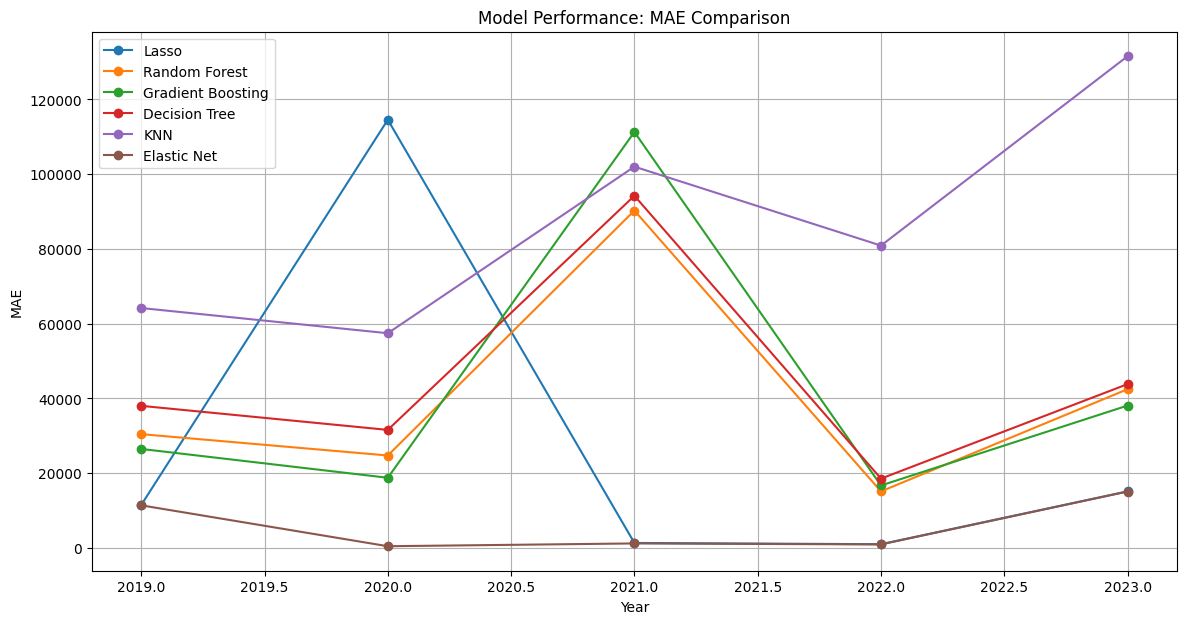

In [38]:
metrics_df_combined = combine_metrics(('Lasso', lasso_metrics), ('Random Forest', random_metrics), ('Gradient Boosting', gradient_metrics), ('Decision Tree', decision_metrics), ('KNN', knn_metrics), ('Elastic Net', elastic_metrics))
visualize_model_comparison(metrics_df_combined)

In [40]:
df['academicYear'] = pd.to_datetime(df['academicYear'])
print(df['academicYear'].dtype)

datetime64[ns]


In [44]:
class HybridModel:
    def __init__(self):
        # Prophet requires 'ds' (date) and 'y' (target) columns
        self.prophet = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode='multiplicative'
        )
        
        self.rf_model = RandomForestRegressor(
            n_estimators=100,
            max_depth=10,
            random_state=42
        )
        
        self.linear_model = LinearRegression()
        
    def prepare_prophet_data(self, X, y=None):
        # Prophet requires specific column names
        prophet_df = pd.DataFrame()
        prophet_df['ds'] = pd.to_datetime(X['academicYear'].astype(str))
        if y is not None:
            prophet_df['y'] = y
        return prophet_df
    
    def fit(self, X, y):
        # Fit Prophet
        prophet_data = self.prepare_prophet_data(X, y)
        self.prophet.fit(prophet_data)
        
        # Get Prophet predictions for training
        prophet_preds = self.prophet.predict(prophet_data)['yhat']
        
        # Fit RF and Linear with remaining features
        features_for_other_models = X[numerical_features + categorical_features]
        
        self.rf_model.fit(features_for_other_models, y)
        self.linear_model.fit(X[numerical_features], y)
        
    def predict(self, X):
        # Get predictions from each model
        prophet_data = self.prepare_prophet_data(X)
        prophet_preds = self.prophet.predict(prophet_data)['yhat']
        
        rf_preds = self.rf_model.predict(X[numerical_features + categorical_features])
        linear_preds = self.linear_model.predict(X[numerical_features])
        
        # Combine predictions (simple average)
        final_predictions = (prophet_preds + rf_preds + linear_preds) / 3
        return final_predictions

In [48]:
# Exclude target variable and any identifier columns
exclude_cols = ['baseRanking']  # Add any other columns you want to exclude
feature_cols = [col for col in df.columns if col not in exclude_cols]
categorical_features = [
    'universityType_devlet', 'universityType_vakıf', 'programType_DİL', 'programType_EA', 
    'programType_SAY', 'programType_SÖZ', 'language_Almanca', 'language_Arapça', 'language_Bulgarca',  
    'language_Ermenice', 'language_Fransızca', 'language_Korece', 'language_Lehçe', 'language_Rusça', 
    'language_Türkçe', 'language_Çince', 'language_İngilizce', 'language_İspanyolca', 'language_İtalyanca', 
     'baseRanking' ,'idOSYM''universityName_encoded', 'departmentName_encoded', 'facultyName_encoded',
     'universityLocation', 'universityRegion'
]
numerical_features = [col for col in df.columns if col not in categorical_features]

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['academicYear', 'scholarshipRate', 'quota', 'occupiedSlots', 'tuitionFee', 'universityLocation', 'universityRegion', 'profCount', 'assoCount', 'docCount', 'topRanking', 'avgAdmissionRanking(TYT)', 'baseAdmissionRanking(TYT)', 'stdDeviationStudents', 'revenue', 'outOfCityStudentRate', 'totalPreference', 'top1PreferenceRatio', 'avgOrderofPreference', 'avgAdmittedStudentPrefOrder', 'top1AdmittedRatio', 'top3AdmittedRatio', 'top10AdmittedRatio', 'admittedTotalPref', 'admittedTotalDepartmentPref', 'currentStudentCount', 'baseScore', 'topScore', 'totalForeignStudents', 'totalStudentNumber', 'Urap_Rank', 'Urap_Score', 'avg_monthly_income_group', 'Time_for_employment', 'employment_rate', 'base_salary_by_year', 'inflation_by_year', 'growth_by_year', 'universityName_encoded', 'departmentName_encoded', 'facultyName_encoded', 'lag_baseRanking']

Categorical Features:
['universityType_devlet', 'universityType_vakıf', 'programType_DİL', 'programType_EA', 'programType_SAY', 'prog

In [45]:


# Split data by years
x_year = []
y_year = []
for year in range(2019, 2025):
    year_data = df[df['academicYear'] == year]
    x_year.append(year_data[feature_cols])
    y_year.append(year_data['baseRanking'])  # Your target variable

# Initialize storage dictionaries
hybrid_metrics = {}
hybrid_model_year = {}

# Train and evaluate
model = HybridModel()

for i in range(1, len(x_year)):
    year = 2019+i-1
    print(f"\nTraining for year {year}...")
    
    # Train and get predictions
    model, pred = train(model, x_year[i-1], y_year[i-1], x_year[i])
    
    # Calculate metrics
    rmse, mae, r2 = evaluate(y_year[i], pred)
    
    # Store metrics and model
    hybrid_metrics[year] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    hybrid_model_year[year] = model
    
    print(f"Year {year} Metrics:")
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

# Combine metrics into a DataFrame
metrics_df_hybrid = pd.DataFrame(hybrid_metrics).T
visualize_model_performance(metrics_df_hybrid)



Training for year 2019...


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by LinearRegression.